In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
lifeexp_df = pd.read_sql_query('select * from lifeexpectancy', con = engine)

In [3]:
engine.dispose()

## ## Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

## Getting an idea about the data using info, isnull and head methods 

In [4]:
lifeexp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
lifeexp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Looking at percentage of missing values

In [6]:
lifeexp_df.isnull().sum()*100/lifeexp_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
lifeexp1 = lifeexp_df.groupby(lifeexp_df.Country)

In [8]:
lifeexp1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8


In [9]:
lifeexp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## It appears that there are no missing values in HIV AIDS, under_5_deaths, measles, percentage_expenditure, infant deaths, status, year and country. Since this is a Timeseries data, we will be filling the missing values with interpolation

In [10]:
lifeexp1 = lifeexp_df.copy()

In [11]:
col_list = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 
                 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
            'Income composition of resources', 'Schooling']
for col in col_list:
    lifeexp1.loc[:, col] = lifeexp1.loc[:, col].interpolate()
    

## Checking to see if we have any more missing values

In [12]:
lifeexp1.isnull().sum()*100/lifeexp1.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [13]:
## Removing begining and trailing spaces in column names
lifeexp1.columns = lifeexp1.columns.str.strip()

## Outlier detection

Text(0.5, 1.0, 'Schooling')

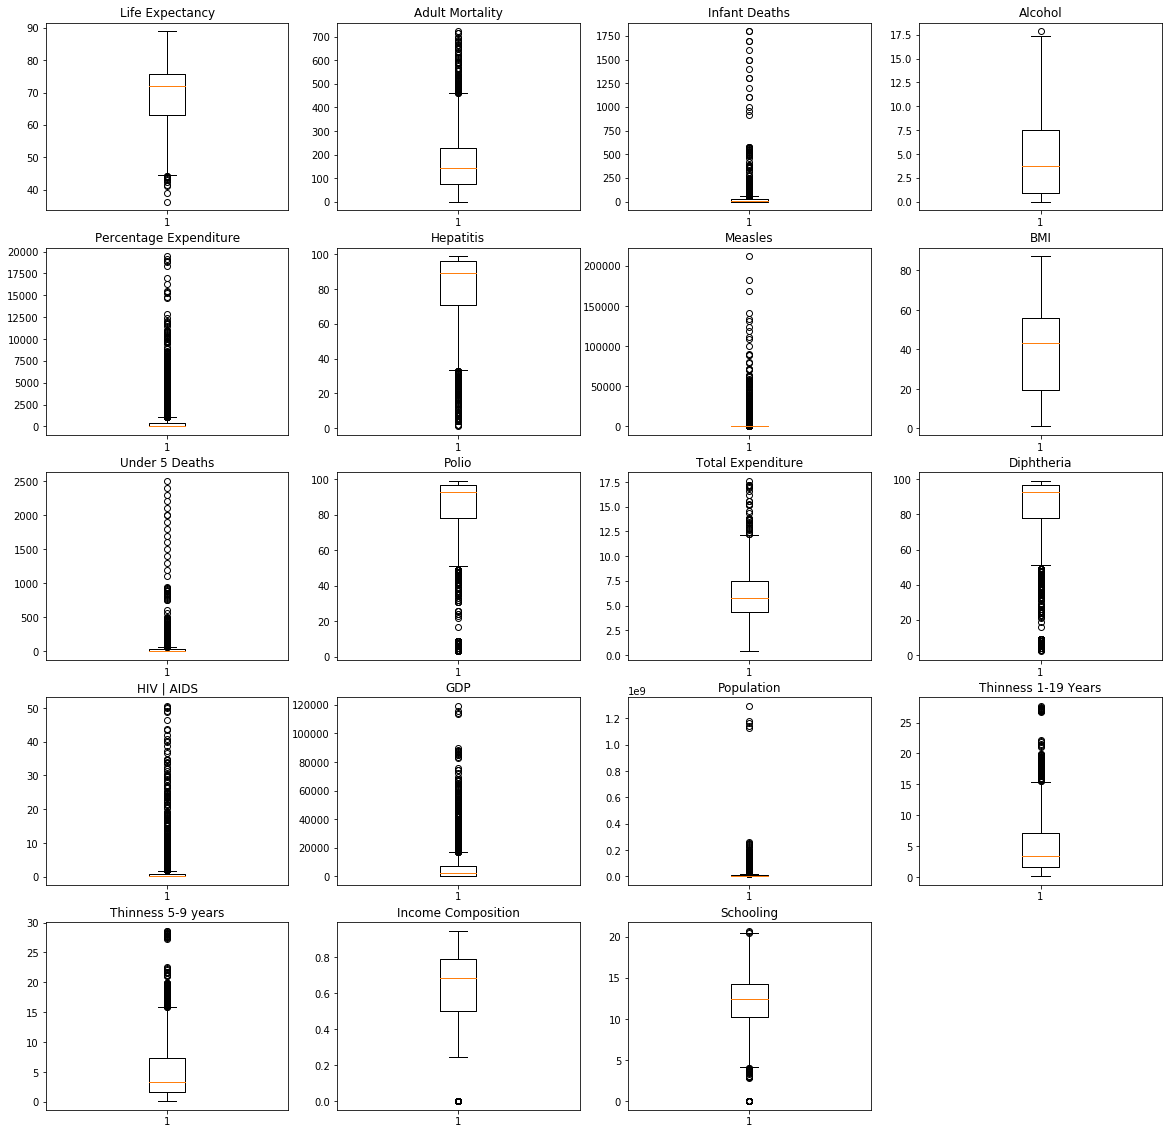

In [14]:
plt.figure(figsize= (20, 20))
plt.subplot(5,4,1)
plt.boxplot(lifeexp1['Life expectancy'])
plt.title("Life Expectancy")

plt.subplot(5,4,2)
plt.boxplot(lifeexp1['Adult Mortality'])
plt.title('Adult Mortality')

plt.subplot(5,4,3)
plt.boxplot(lifeexp1['infant deaths'])
plt.title("Infant Deaths")

plt.subplot(5,4,4)
plt.boxplot(lifeexp1['Alcohol'])
plt.title("Alcohol")

plt.subplot(5,4,5)
plt.boxplot(lifeexp1['percentage expenditure'])
plt.title("Percentage Expenditure")

plt.subplot(5,4,6)
plt.boxplot(lifeexp1['Hepatitis B'])
plt.title('Hepatitis')

plt.subplot(5,4,7)
plt.boxplot(lifeexp1['Measles'])
plt.title("Measles")

plt.subplot(5,4,8)
plt.boxplot(lifeexp1['BMI'])
plt.title("BMI")

plt.subplot(5,4,9)
plt.boxplot(lifeexp1['under-five deaths'])
plt.title('Under 5 Deaths')

plt.subplot(5,4,10)
plt.boxplot(lifeexp1['Polio'])
plt.title("Polio")

plt.subplot(5,4,11)
plt.boxplot(lifeexp1['Total expenditure'])
plt.title("Total Expenditure")

plt.subplot(5,4,12)
plt.boxplot(lifeexp1['Diphtheria'])
plt.title("Diphtheria")

plt.subplot(5,4,13)
plt.boxplot(lifeexp1['HIV/AIDS'])
plt.title("HIV | AIDS")

plt.subplot(5,4,14)
plt.boxplot(lifeexp1['GDP'])
plt.title("GDP")

plt.subplot(5,4,15)
plt.boxplot(lifeexp1['Population'])
plt.title("Population")

plt.subplot(5,4,16)
plt.boxplot(lifeexp1['thinness  1-19 years'])
plt.title("Thinness 1-19 Years")

plt.subplot(5,4,17)
plt.boxplot(lifeexp1['thinness 5-9 years'])
plt.title("Thinness 5-9 years")

plt.subplot(5,4,18)
plt.boxplot(lifeexp1['Income composition of resources'])
plt.title("Income Composition")

plt.subplot(5,4,19)
plt.boxplot(lifeexp1['Schooling'])
plt.title("Schooling")

Text(0.5, 1.0, 'Schooling')

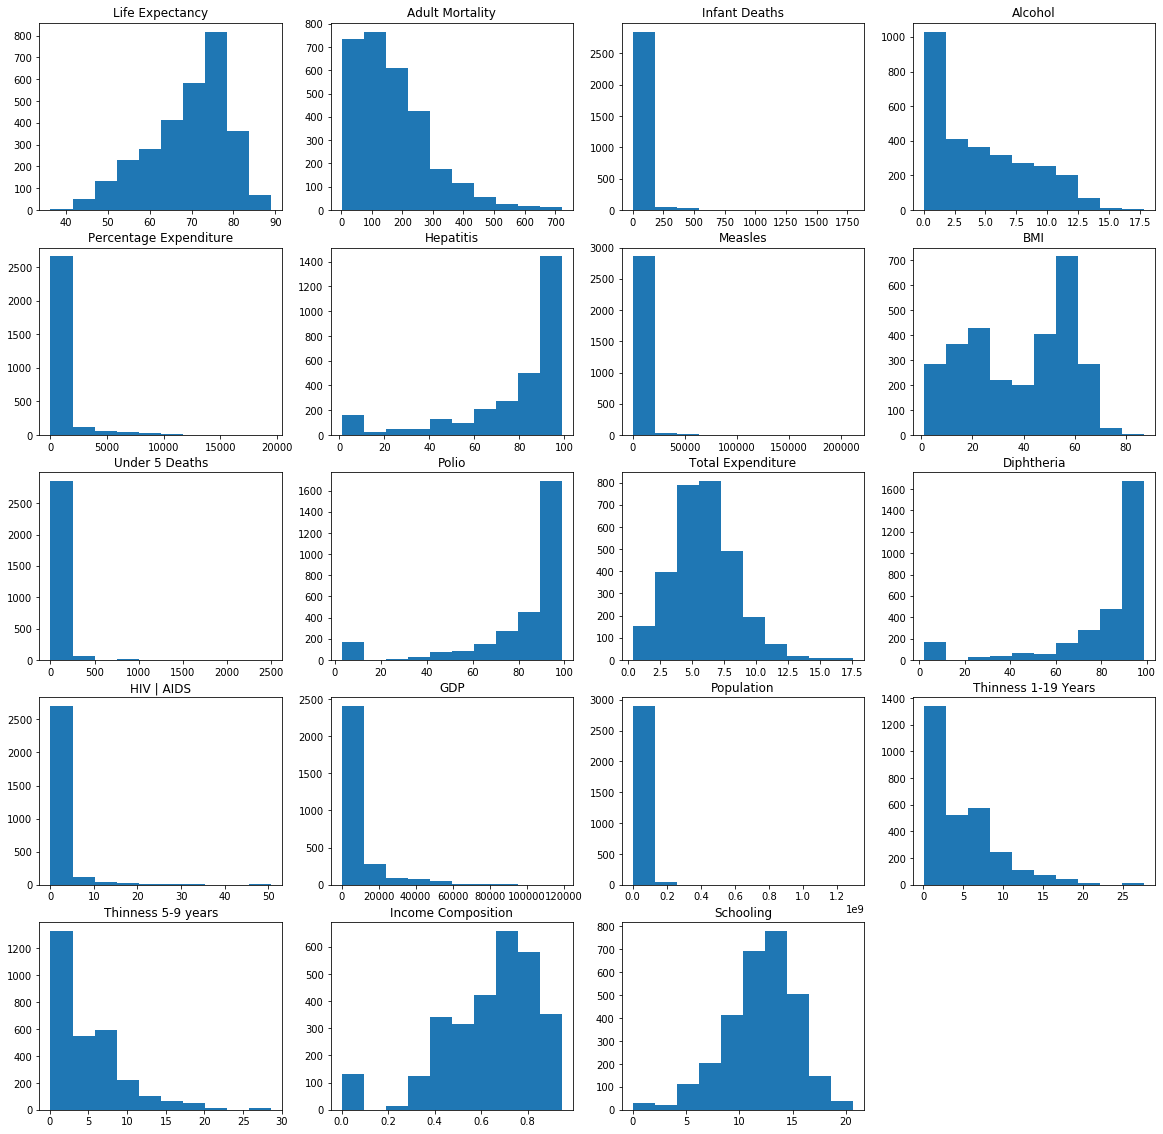

In [15]:
plt.figure(figsize= (20, 20))
plt.subplot(5,4,1)
plt.hist(lifeexp1['Life expectancy'])
plt.title("Life Expectancy")

plt.subplot(5,4,2)
plt.hist(lifeexp1['Adult Mortality'])
plt.title('Adult Mortality')

plt.subplot(5,4,3)
plt.hist(lifeexp1['infant deaths'])
plt.title("Infant Deaths")

plt.subplot(5,4,4)
plt.hist(lifeexp1['Alcohol'])
plt.title("Alcohol")

plt.subplot(5,4,5)
plt.hist(lifeexp1['percentage expenditure'])
plt.title("Percentage Expenditure")

plt.subplot(5,4,6)
plt.hist(lifeexp1['Hepatitis B'])
plt.title('Hepatitis')

plt.subplot(5,4,7)
plt.hist(lifeexp1['Measles'])
plt.title("Measles")

plt.subplot(5,4,8)
plt.hist(lifeexp1['BMI'])
plt.title("BMI")

plt.subplot(5,4,9)
plt.hist(lifeexp1['under-five deaths'])
plt.title('Under 5 Deaths')

plt.subplot(5,4,10)
plt.hist(lifeexp1['Polio'])
plt.title("Polio")

plt.subplot(5,4,11)
plt.hist(lifeexp1['Total expenditure'])
plt.title("Total Expenditure")

plt.subplot(5,4,12)
plt.hist(lifeexp1['Diphtheria'])
plt.title("Diphtheria")

plt.subplot(5,4,13)
plt.hist(lifeexp1['HIV/AIDS'])
plt.title("HIV | AIDS")

plt.subplot(5,4,14)
plt.hist(lifeexp1['GDP'])
plt.title("GDP")

plt.subplot(5,4,15)
plt.hist(lifeexp1['Population'])
plt.title("Population")

plt.subplot(5,4,16)
plt.hist(lifeexp1['thinness  1-19 years'])
plt.title("Thinness 1-19 Years")

plt.subplot(5,4,17)
plt.hist(lifeexp1['thinness 5-9 years'])
plt.title("Thinness 5-9 years")

plt.subplot(5,4,18)
plt.hist(lifeexp1['Income composition of resources'])
plt.title("Income Composition")

plt.subplot(5,4,19)
plt.hist(lifeexp1['Schooling'])
plt.title("Schooling")

## Except BMI and Alcohol, it looks like all the other variables have outliers from visualization

In [16]:
from scipy.stats import zscore
zscores_lifeexp = zscore(lifeexp1['Life expectancy'])
for threshold in range(1,6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(zscores_lifeexp > threshold))
    print("Number of outliers is: {}".format(len((np.where(zscores_lifeexp > threshold)[0]))))


The score threshold is: 1
The indices of the outliers:
(array([ 113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  241,  242,  243,  244,
        245,  246,  247,  248,  249,  250,  251,  252,  496,  497,  498,
        499,  500,  501,  502,  503,  504,  505,  506,  507,  508,  509,
        510,  511,  544,  545,  546,  547,  548,  549,  550,  551,  552,
        553,  625,  626,  627,  628,  629,  631,  632,  633,  657,  658,
        661,  673,  674,  675,  676,  677,  678,  679,  680,  681,  682,
        689,  737,  738,  739,  740,  741,  742,  743,  744,  802,  804,
        915,  916,  917,  918,  919,  920,  921,  922,  923,  924,  925,
        931,  932,  933,  934,  935,  936,  937,  938,  939,  940,  941,
        942,  943,  944,  945,  946,  995,  996,  997,  998,  999, 1000,
       1001, 1002, 1003, 1004, 1005, 1006, 1027, 1028, 1029, 1030, 1

## Outliers in Life Expectancy are nothing but the developed countries which have higher Life expectancy, we are not going to remove or change them. We can see below that life expectancy >= 79 are developed and these are showing up as outliers

In [17]:
lifeexp1.loc[lifeexp1['Life expectancy'] >= 79, ['Status', 'Country']]

,Status,Country
113,Developed,Australia
114,Developed,Australia
115,Developed,Australia
116,Developed,Australia
117,Developed,Australia
...,...,...
2770,Developed,United Kingdom of Great Britain and Northern I...
2771,Developed,United Kingdom of Great Britain and Northern I...
2772,Developed,United Kingdom of Great Britain and Northern I...
2794,Developed,United States of America


In [18]:
zscores_adultmorta = zscore(lifeexp1['Adult Mortality'])
for threshold in range(1, 6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outlliers: ")
    print(np.where(zscores_adultmorta > threshold))
    print("Number of outliers: {}".format(len((np.where(zscores_adultmorta > threshold)[0]))))

The score threshold is: 1
The indices of the outlliers: 
(array([   8,    9,   10,   11,   12,   14,   15,   37,   49,   50,   51,
         52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,
        304,  341,  342,  343,  344,  345,  346,  347,  348,  349,  350,
        351,  352,  409,  411,  412,  413,  414,  415,  416,  418,  420,
        421,  423,  425,  426,  427,  428,  429,  430,  431,  432,  433,
        435,  436,  437,  438,  439,  440,  441,  442,  443,  444,  445,
        446,  447,  480,  481,  482,  483,  484,  486,  487,  488,  489,
        491,  492,  495,  512,  513,  514,  515,  516,  517,  518,  519,
        520,  522,  523,  528,  529,  530,  531,  532,  533,  535,  536,
        537,  613,  614,  615,  616,  617,  618,  620,  621,  622,  623,
        727,  728,  729,  731,  732,  733,  734,  736,  760,  761,  763,
        764,  765,  766,  767,  768,  837,  838,  839,  840,  842,  843,
        844,  845,  846,  847,  848,  849,  850,  856,  857,  858,

In [19]:
# Winsorizing the variable Adult Mortality
from scipy.stats.mstats import winsorize
winsorize_adultmortality = winsorize(lifeexp1['Adult Mortality'], (0, 0.03))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c00a908>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c00ada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c00a518>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c0106d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c010a20>],
 'means': []}

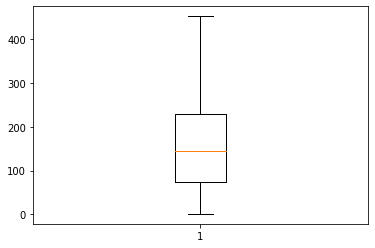

In [20]:
plt.boxplot(winsorize_adultmortality)

In [21]:
len(lifeexp1.loc[lifeexp1['Adult Mortality'] >= 450, 'Country'])

91

In [22]:
lifeexp1['winsorized_adultmortality'] = winsorize_adultmortality

In [23]:
lifeexp1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,winsorized_adultmortality
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,263.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,271.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,268.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,272.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,275.0


In [24]:
zscore_infantdeath = zscore(lifeexp1['infant deaths'])
for threshold in range(1,6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(zscore_infantdeath > threshold))
    print("Number of outliers: {}".format(len((np.where(zscore_infantdeath > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([ 201,  202,  203,  204,  205,  206,  207,  208,  560,  561,  562,
        563,  564,  565,  566,  567,  568,  569,  570,  571,  572,  573,
        574,  575,  721,  722,  723,  724,  725,  726,  727,  728,  729,
        730,  731,  732,  733,  734,  735,  736,  886,  887,  888,  889,
        890,  891,  892,  893,  894,  895,  896,  897,  898, 1187, 1188,
       1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199,
       1200, 1201, 1202, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217,
       1218, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958]),)
Number of outliers: 110
The score threshold is: 2
The indices of the outliers:
(array([ 568,  569,  570,  571,  572,  573,  574,  575, 1187, 1188, 1189,
       1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 119

In [25]:
len(lifeexp1.loc[lifeexp1['infant deaths'] >= 1000])

14

## For every 1000 infants there are more than 1000 deaths in 14 rows, which is not right, we have to cap them

In [26]:
winsorized_infantdeath = winsorize(lifeexp1['infant deaths'], (0, 0.11))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c578710>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c578da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c578320>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c583470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c5837b8>],
 'means': []}

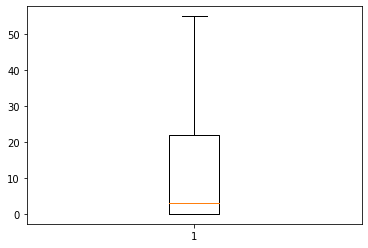

In [27]:
plt.boxplot(winsorized_infantdeath)

In [28]:
lifeexp1['winsorized_infantdeath'] = winsorized_infantdeath

In [29]:
from scipy.stats import zscore
zscores_alcohol = zscore(lifeexp1['Alcohol'])
for threshold in range(1,6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(zscores_lifeexp > threshold))
    print("Number of outliers is: {}".format(len((np.where(zscores_lifeexp > threshold)[0]))))


The score threshold is: 1
The indices of the outliers:
(array([ 113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  241,  242,  243,  244,
        245,  246,  247,  248,  249,  250,  251,  252,  496,  497,  498,
        499,  500,  501,  502,  503,  504,  505,  506,  507,  508,  509,
        510,  511,  544,  545,  546,  547,  548,  549,  550,  551,  552,
        553,  625,  626,  627,  628,  629,  631,  632,  633,  657,  658,
        661,  673,  674,  675,  676,  677,  678,  679,  680,  681,  682,
        689,  737,  738,  739,  740,  741,  742,  743,  744,  802,  804,
        915,  916,  917,  918,  919,  920,  921,  922,  923,  924,  925,
        931,  932,  933,  934,  935,  936,  937,  938,  939,  940,  941,
        942,  943,  944,  945,  946,  995,  996,  997,  998,  999, 1000,
       1001, 1002, 1003, 1004, 1005, 1006, 1027, 1028, 1029, 1030, 1

In [30]:
# we have very few outliers in Alcohol variable 
lifeexp1['winsorized_alcohol'] = winsorize(lifeexp1['Alcohol'], (0, 0.01))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c72e630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c72ed30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c72e240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c739400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c739748>],
 'means': []}

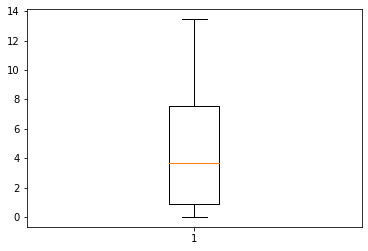

In [31]:
plt.boxplot(lifeexp1['winsorized_alcohol'])

In [32]:
from scipy.stats import zscore
zscores_percentexp = zscore(lifeexp1['percentage expenditure'])
for threshold in range(1,6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(zscores_percentexp > threshold))
    print("Number of outliers is: {}".format(len((np.where(zscores_percentexp > threshold)[0]))))


The score threshold is: 1
The indices of the outliers:
(array([ 114,  115,  116,  117,  118,  119,  120,  122,  125,  127,  130,
        132,  133,  134,  135,  136,  137,  139,  140,  142,  143,  144,
        242,  248,  250,  251,  252,  255,  371,  372,  498,  499,  501,
        503,  504,  506,  507,  508,  509,  510,  511,  738,  739,  741,
        743,  744,  745,  747,  748,  750,  916,  917,  918,  923,  925,
        926,  927,  928,  929,  932,  933,  937,  938,  940,  941,  942,
        943,  944,  945,  946, 1000, 1001, 1002, 1003, 1004, 1005, 1006,
       1009, 1010, 1031, 1032, 1034, 1035, 1037, 1172, 1174, 1176, 1178,
       1179, 1181, 1182, 1184, 1185, 1186, 1254, 1255, 1256, 1257, 1258,
       1259, 1260, 1262, 1264, 1265, 1266, 1268, 1269, 1270, 1271, 1284,
       1286, 1287, 1288, 1289, 1291, 1293, 1294, 1295, 1296, 1319, 1322,
       1323, 1324, 1325, 1326, 1328, 1329, 1330, 1397, 1398, 1399, 1401,
       1540, 1541, 1543, 1546, 1548, 1550, 1551, 1553, 1554, 1639, 1

In [33]:
log_perexp = np.log(lifeexp1['percentage expenditure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c7f63c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c7f6ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c7e7f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c7f6ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c8014e0>],
 'means': []}

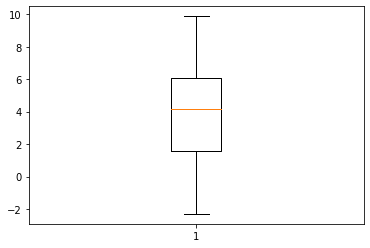

In [34]:
plt.boxplot(log_perexp)

In [35]:
from scipy.stats import zscore
zscores_logperc = zscore(log_perexp)
for threshold in range(1,6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(zscores_logperc > threshold))
    print("Number of outliers is: {}".format(len((np.where(zscores_logperc > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 5
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


## We have no outliers after log transforming the variable Percent_expenditure, however, there are some negative inf values and the distribution is not normal. We should go for winsorization

In [36]:
lifeexp1['winsorization_percexp'] = winsorize(lifeexp1['percentage expenditure'], (0, 0.15))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c857b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c857fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c857748>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c8bd908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c8bdc50>],
 'means': []}

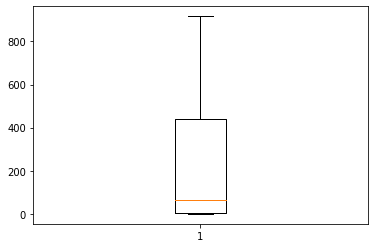

In [37]:
plt.boxplot(lifeexp1['winsorization_percexp'])

In [38]:
from scipy.stats import zscore
zscores_hep = zscore(lifeexp1['Hepatitis B'])
for threshold in range(1,6):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(zscores_hep > threshold))
    print("Number of outliers is: {}".format(len((np.where(zscores_hep > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 5
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [39]:
# According to Zscores there are no outliers, trying Tukeys
q75, q25 = np.percentile(lifeexp1["Hepatitis B"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexp1["Hepatitis B"] > max_val) 
                      | (lifeexp1["Hepatitis B"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 372
The score threshold is: 1.5
Number of outliers is: 248
The score threshold is: 2.0
Number of outliers is: 190
The score threshold is: 2.5
Number of outliers is: 95
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [40]:
log_heptatisb = np.log(lifeexp1['Hepatitis B'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c971dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c97d4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c9719e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c97db38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c97de80>],
 'means': []}

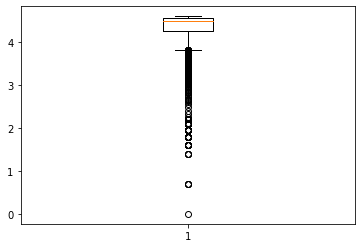

In [41]:
plt.boxplot(log_heptatisb)

## Log transforming the variable does not normalise the variable and still has lot of outliers

In [42]:
lifeexp1['winsorized_hepatitisb'] = winsorize(lifeexp1['Hepatitis B'], (0.09, 0))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ca2f780>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ca2fe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ca2f390>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ca374e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ca37828>],
 'means': []}

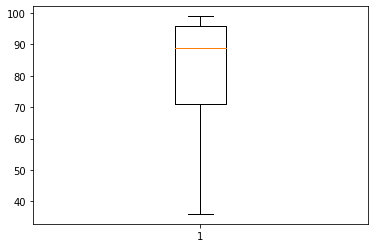

In [43]:
plt.boxplot(lifeexp1['winsorized_hepatitisb'])

In [44]:
zscore_measles = zscore(lifeexp1['Measles'])
for threshold in range(1,6):
    print("The threshold score is: {}".format(threshold))
    print("The indices of the score are: ")
    print(np.where(zscore_measles > threshold))
    print("Number of outliers is : {}".format(len((np.where(zscore_measles > threshold)[0]))))

The threshold score is: 1
The indices of the score are: 
(array([  45,  203,  390,  407,  432,  494,  495,  540,  542,  560,  561,
        562,  565,  566,  567,  568,  569,  570,  571,  572,  573,  574,
        575,  722,  723,  724,  725,  729,  730,  731,  732,  733,  734,
        883,  935, 1026, 1187, 1188, 1190, 1191, 1192, 1193, 1194, 1195,
       1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1206, 1207, 1208,
       1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1241, 1328, 1329,
       1330, 1357, 1378, 1411, 1566, 1567, 1570, 1576, 1717, 1777, 1889,
       1890, 1891, 1892, 1893, 1896, 1898, 1904, 1905, 1906, 1907, 1908,
       1909, 1989, 2025, 2102, 2103, 2263, 2264, 2381, 2456, 2695, 2696,
       2726, 2727, 2728, 2729, 2739, 2744, 2793, 2875, 2889, 2911, 2919,
       2920, 2921]),)
Number of outliers is : 112
The threshold score is: 2
The indices of the score are: 
(array([ 203,  407,  560,  561,  562,  565,  566,  567,  568,  569,  570,
        571,  572,  573,  574, 

In [45]:
log_measles = np.log(lifeexp1['Measles'])

In [46]:
sqrt_measles = np.sqrt(lifeexp1['Measles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1caf6358>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1caf6a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1cae8f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1caf6e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cafe470>],
 'means': []}

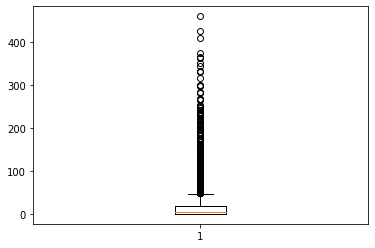

In [47]:
plt.boxplot(sqrt_measles)

## Log transformation and sqrt transformation did not work, going for winsorization

In [48]:
lifeexp1['winsorized_measles'] = winsorize(lifeexp1['Measles'], (0, 0.19))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1cba5dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1cbb1518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1cba59e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1cbb1ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cbb1ef0>],
 'means': []}

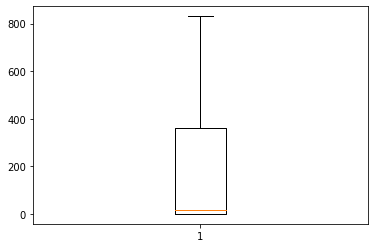

In [49]:
plt.boxplot(lifeexp1['winsorized_measles'])

(array([1863.,  161.,   94.,   61.,   52.,   44.,   26.,   29.,   21.,
         587.]),
 array([  0. ,  83.1, 166.2, 249.3, 332.4, 415.5, 498.6, 581.7, 664.8,
        747.9, 831. ]),
 <a list of 10 Patch objects>)

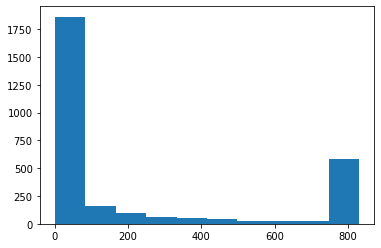

In [50]:
plt.hist(lifeexp1['winsorized_measles'])

In [51]:
lifeexp1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_adultmortality', 'winsorized_infantdeath',
       'winsorized_alcohol', 'winsorization_percexp', 'winsorized_hepatitisb',
       'winsorized_measles'],
      dtype='object')

In [52]:
zscore_under5 = zscore(lifeexp1['under-five deaths'])
for threshold in range(1,13):
    print("The threshold score is {}:".format(threshold))
    print("The indices of outliers: ")
    print(np.where(zscore_under5 > threshold))
    print("Number of outliers: {}".format(len((np.where(zscore_under5 > threshold)[0]))))

The threshold score is 1:
The indices of outliers: 
(array([ 202,  203,  204,  205,  206,  207,  208,  562,  563,  564,  565,
        566,  567,  568,  569,  570,  571,  572,  573,  574,  575,  721,
        722,  723,  724,  725,  726,  727,  728,  729,  730,  731,  732,
        733,  734,  735,  736,  885,  886,  887,  888,  889,  890,  891,
        892,  893,  894,  895,  896,  897,  898, 1187, 1188, 1189, 1190,
       1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201,
       1202, 1214, 1215, 1216, 1217, 1218, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958]),)
Number of outliers: 104
The threshold score is 2:
The indices of outliers: 
(array([ 570,  571,  572,  573,  574,  575,  896,  897,  898, 1187, 1188,
       1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199,
       1200, 1201, 1202, 18

In [53]:
log_under5 = np.log(lifeexp1['under-five deaths'])

## We have some -inf values in log transformation, winsorizing the variable

In [54]:
winsorized_under5 = winsorize(lifeexp1['under-five deaths'], (0, 0.15))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ccf9438>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ccf9b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ccf9048>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ccf9f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cd05550>],
 'means': []}

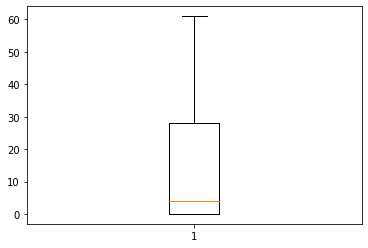

In [55]:
plt.boxplot(winsorized_under5)

In [56]:
max(winsorized_under5)

61

In [57]:
len(lifeexp1[lifeexp1['under-five deaths'] > 1000])

16

In [58]:
lifeexp1['winsorized_under5'] = winsorize(lifeexp1['under-five deaths'], (0, 0.15))

In [59]:
zscore_polio = zscore(lifeexp1['Polio'])
for threshold in range(-10,1):
    print("The threshold score is {}:".format(threshold))
    print("The indices of outliers: ")
    print(np.where(zscore_polio > threshold))
    print("Number of outliers: {}".format(len((np.where(zscore_polio > threshold)[0]))))

The threshold score is -10:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -9:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -8:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -7:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -6:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -5:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -4:
The indices of outliers: 
(array([   0,    1,    2, ..., 2935, 2936, 2937]),)
Number of outliers: 2938
The threshold score is -3:
The indices of outliers: 
(array([   1,    2,    3, ..., 2935,

In [60]:
# According to Zscores there are no outliers, trying Tukeys
q75_pol, q25_pol = np.percentile(lifeexp1["Polio"], [75 ,25])
iqr = q75_pol - q25_pol

for threshold in np.arange(1,5,0.5):
    min_val = q25_pol- (iqr*threshold)
    max_val = q75_pol + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexp1["Polio"] > max_val) 
                      | (lifeexp1["Polio"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 361
The score threshold is: 1.5
Number of outliers is: 282
The score threshold is: 2.0
Number of outliers is: 204
The score threshold is: 2.5
Number of outliers is: 180
The score threshold is: 3.0
Number of outliers is: 173
The score threshold is: 3.5
Number of outliers is: 172
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [61]:
log_polio = np.log(lifeexp1['Polio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c655ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c655f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c6556d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c662898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c662be0>],
 'means': []}

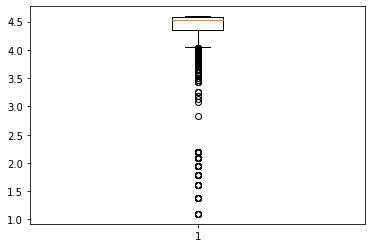

In [62]:
plt.boxplot(log_polio)

## Log transformation does not reduce the outliers

In [63]:
winsorized_polio = winsorize(lifeexp1['Polio'], (0.10, 0))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1cef4588>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1cef4c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1cef4198>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1cef45f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cf676a0>],
 'means': []}

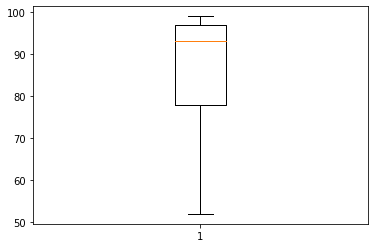

In [64]:
plt.boxplot(winsorized_polio)

In [65]:
min(lifeexp1['Polio'])

3.0

In [66]:
min(winsorized_polio)

52.0

In [67]:
lifeexp1['winsorization_polio'] = winsorize(lifeexp1['Polio'])

In [68]:
log_totalexp = np.log(lifeexp1['Total expenditure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c80b7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c53d978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c75de10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c8e2198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c9882e8>],
 'means': []}

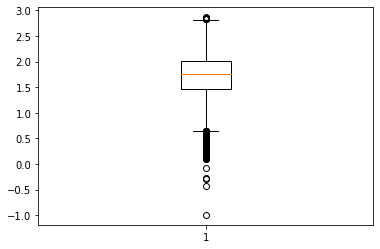

In [69]:
plt.boxplot(log_totalexp)

## Applying log did not help with outliers, winsorizing the variable

In [70]:
lifeexp1['winsorized_totalexp'] = winsorize(lifeexp1['Total expenditure'], (0, 0.02))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d0d16d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d0d1dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d0d12e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d0d94a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d0d97f0>],
 'means': []}

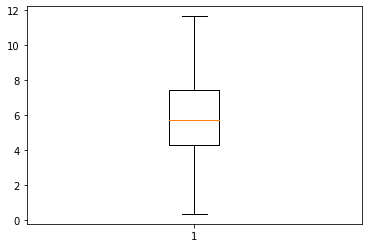

In [71]:
plt.boxplot(lifeexp1['winsorized_totalexp'])

## Winsorizing 2 percent of values removed outliers

In [72]:
q75_diph, q25_diph = np.percentile(lifeexp1["Diphtheria"], [75 ,25])
iqr = q75_diph - q25_diph

for threshold in np.arange(1,5,0.5):
    min_val = q25_diph - (iqr*threshold)
    max_val = q75_diph + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexp1["Diphtheria"] > max_val) 
                      | (lifeexp1["Diphtheria"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 350
The score threshold is: 1.5
Number of outliers is: 301
The score threshold is: 2.0
Number of outliers is: 232
The score threshold is: 2.5
Number of outliers is: 192
The score threshold is: 3.0
Number of outliers is: 172
The score threshold is: 3.5
Number of outliers is: 170
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [73]:
log_diphtheria = np.log(lifeexp1['Diphtheria'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d131dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d1a7518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d1319e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d1a7ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d1a7ef0>],
 'means': []}

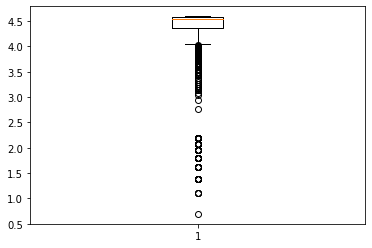

In [74]:
plt.boxplot(log_diphtheria)

In [75]:
lifeexp1['winsorized_diphtheria'] = winsorize(lifeexp1['Diphtheria'], (0.11, 0))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d26ed30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d27a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d26e940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d27ab00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d27ae48>],
 'means': []}

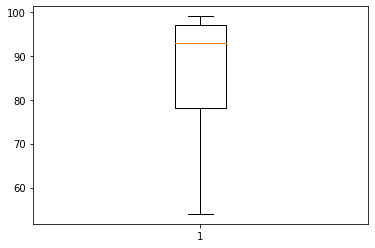

In [76]:
plt.boxplot(lifeexp1['winsorized_diphtheria'])

In [77]:
zscore_hiv = zscore(lifeexp1['HIV/AIDS'])
for threshold in range(1,12):
    print("The threshold score is: {}".format(threshold))
    print("The indices of outliers are: ")
    print(np.where(zscore_hiv > threshold))
    print("Number of outliers: {}".format(len((np.where(zscore_hiv > threshold)[0]))))

The threshold score is: 1
The indices of outliers are: 
(array([  37,  343,  344,  345,  346,  347,  348,  349,  350,  351,  352,
        446,  447,  488,  489,  490,  491,  492,  493,  494,  495,  518,
        519,  520,  521,  522,  523,  524,  525,  526,  527,  621,  622,
        623,  838,  839,  840,  841,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962, 1371, 1372, 1373, 1374, 1375, 1376,
       1377, 1378, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483,
       1484, 1485, 1486, 1487, 1488, 1489, 1490, 1574, 1575, 1576, 1577,
       1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1768, 1769,
       1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780,
       1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 2162,
       2163, 2164, 2165, 2166, 2167, 2396, 2397, 2398, 2399, 2400, 2401,
       2402, 2403, 2404, 2405, 2406, 2407, 2408, 2489, 2490, 2491, 2492,
       2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 

In [78]:
log_hiv = np.log(lifeexp1['HIV/AIDS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d33eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d33ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d33e780>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d349940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d349c88>],
 'means': []}

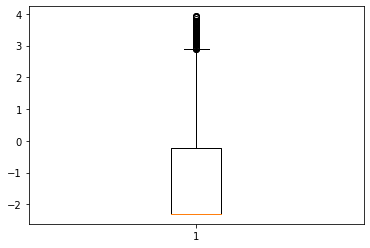

In [79]:
plt.boxplot(log_hiv)

## Log transformation did not remove the outliers, applying winsorization

In [80]:
lifeexp1['winsorized_hiv'] = winsorize(lifeexp1['HIV/AIDS'], (0, 0.19))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d404dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d411518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d4049e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d411ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d411ef0>],
 'means': []}

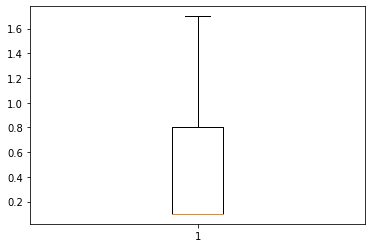

In [81]:
plt.boxplot(lifeexp1['winsorized_hiv'])

(array([1905.,  184.,   42.,   64.,   32.,   44.,   33.,   14.,   36.,
         584.]),
 array([0.1 , 0.26, 0.42, 0.58, 0.74, 0.9 , 1.06, 1.22, 1.38, 1.54, 1.7 ]),
 <a list of 10 Patch objects>)

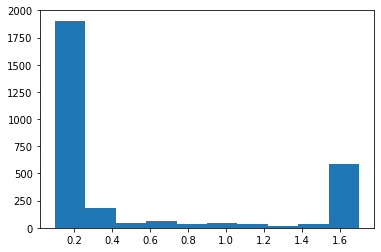

In [82]:
plt.hist(lifeexp1['winsorized_hiv'])

In [83]:
zscore_gdp = zscore(lifeexp1['GDP'])
for threshold in range(1,10):
    print("The threshold score is: {}".format(threshold))
    print("The indices of outliers: ")
    print(np.where(zscore_gdp > threshold))
    print("Number of outliers: {}".format(len((np.where(zscore_gdp > threshold)[0]))))

The threshold score is: 1
The indices of outliers: 
(array([ 113,  114,  115,  116,  117,  118,  119,  120,  122,  125,  129,
        130,  132,  133,  134,  135,  136,  137,  139,  140,  142,  143,
        144,  176,  177,  178,  180,  242,  248,  250,  251,  252,  255,
        371,  372,  374,  375,  376,  377,  380,  496,  498,  499,  501,
        503,  504,  506,  507,  508,  509,  510,  511,  676,  677,  681,
        682,  683,  684,  738,  739,  741,  743,  744,  745,  747,  748,
        750,  838,  839,  842,  916,  917,  918,  923,  925,  926,  927,
        928,  929,  930,  931,  932,  933,  937,  938,  940,  941,  942,
        943,  944,  945,  946,  995, 1000, 1001, 1002, 1003, 1004, 1005,
       1006, 1009, 1010, 1028, 1029, 1030, 1031, 1032, 1034, 1035, 1037,
       1038, 1172, 1174, 1176, 1178, 1179, 1181, 1182, 1184, 1185, 1186,
       1254, 1255, 1256, 1257, 1258, 1259, 1260, 1262, 1264, 1265, 1266,
       1267, 1268, 1269, 1270, 1271, 1273, 1274, 1284, 1286, 1287, 1288

In [84]:
log_gdp = np.log(lifeexp1['GDP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d5c6f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d5d3908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d5c6dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d5d3f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d5d3278>],
 'means': []}

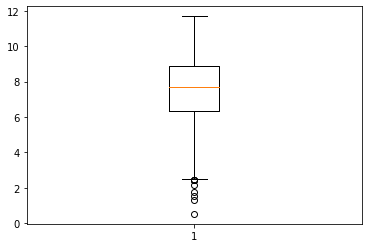

In [85]:
plt.boxplot(log_gdp)

## Applying log still has lot of outliers, applying winsorization

In [86]:
lifeexp1['winsorized_gdp'] = winsorize(lifeexp1['GDP'], (0, 0.12))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d632550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d632c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d632160>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d6325c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d63c668>],
 'means': []}

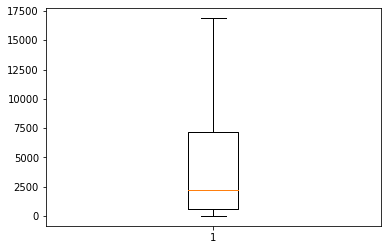

In [87]:
plt.boxplot(lifeexp1['winsorized_gdp'])

In [88]:
log_pop = np.log(lifeexp1['Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d769fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d777710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d769be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d777da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d777e80>],
 'means': []}

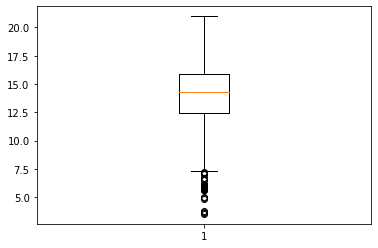

In [89]:
plt.boxplot(log_pop)

(array([  7.,  24.,  57., 181., 427., 605., 822., 627., 177.,  11.]),
 array([ 3.52636052,  5.271814  ,  7.01726748,  8.76272095, 10.50817443,
        12.25362791, 13.99908138, 15.74453486, 17.48998834, 19.23544181,
        20.98089529]),
 <a list of 10 Patch objects>)

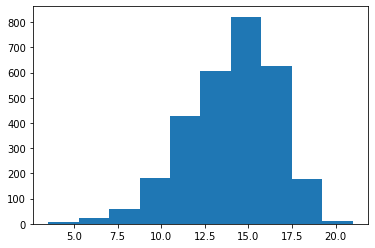

In [90]:
plt.hist(log_pop)

In [91]:
lifeexp1['winsorized_pop'] = winsorize(lifeexp1['Population'], (0, 0.13))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d8c1630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d8c1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d8c1240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d934400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d934748>],
 'means': []}

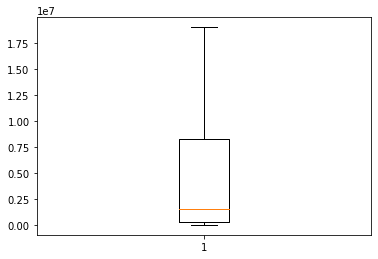

In [92]:
plt.boxplot(lifeexp1['winsorized_pop'])

(array([1548.,  299.,  193.,  130.,  107.,   62.,   58.,   54.,   70.,
         417.]),
 array([3.40000000e+01, 1.89874180e+06, 3.79744960e+06, 5.69615740e+06,
        7.59486520e+06, 9.49357300e+06, 1.13922808e+07, 1.32909886e+07,
        1.51896964e+07, 1.70884042e+07, 1.89871120e+07]),
 <a list of 10 Patch objects>)

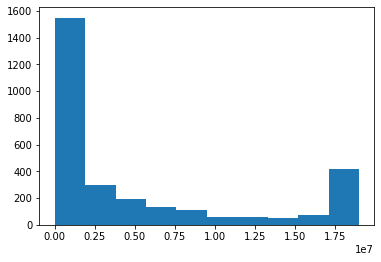

In [93]:
plt.hist(lifeexp1['winsorized_pop'])

In [94]:
max(lifeexp1['winsorized_pop'])

18987112.0

(array([1548.,  299.,  193.,  130.,  107.,   62.,   58.,   54.,   70.,
         417.]),
 array([3.40000000e+01, 1.89874180e+06, 3.79744960e+06, 5.69615740e+06,
        7.59486520e+06, 9.49357300e+06, 1.13922808e+07, 1.32909886e+07,
        1.51896964e+07, 1.70884042e+07, 1.89871120e+07]),
 <a list of 10 Patch objects>)

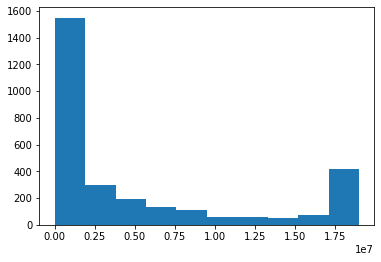

In [95]:
plt.hist(lifeexp1['winsorized_pop'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1db77e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1db82588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1db77a58>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1db82c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1db82f60>],
 'means': []}

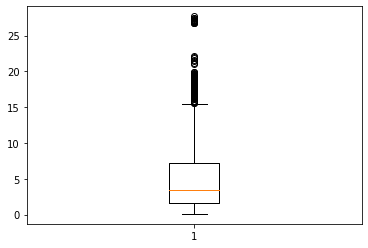

In [96]:
plt.boxplot(lifeexp1['thinness  1-19 years'])

In [97]:
lifeexp1['winsorized_thinness1'] = winsorize(lifeexp1['thinness  1-19 years'], (0, 0.04))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dcb7d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dcc3470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1dcb7940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1dcc3b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1dcc3e48>],
 'means': []}

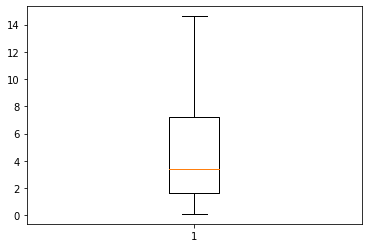

In [98]:
plt.boxplot(lifeexp1['winsorized_thinness1'])

In [99]:
lifeexp1['winsorized_thinness2'] = winsorize(lifeexp1['thinness 5-9 years'], (0, 0.04))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dd266a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dd26da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1dd262b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1dd9b470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1dd9b7b8>],
 'means': []}

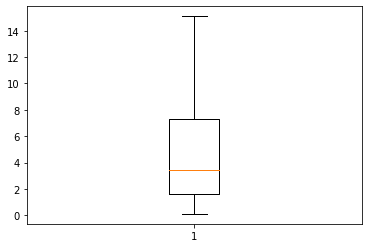

In [100]:
plt.boxplot(lifeexp1['winsorized_thinness2'])

## Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

Text(0.5, 1.0, 'Winsorized TotalExp')

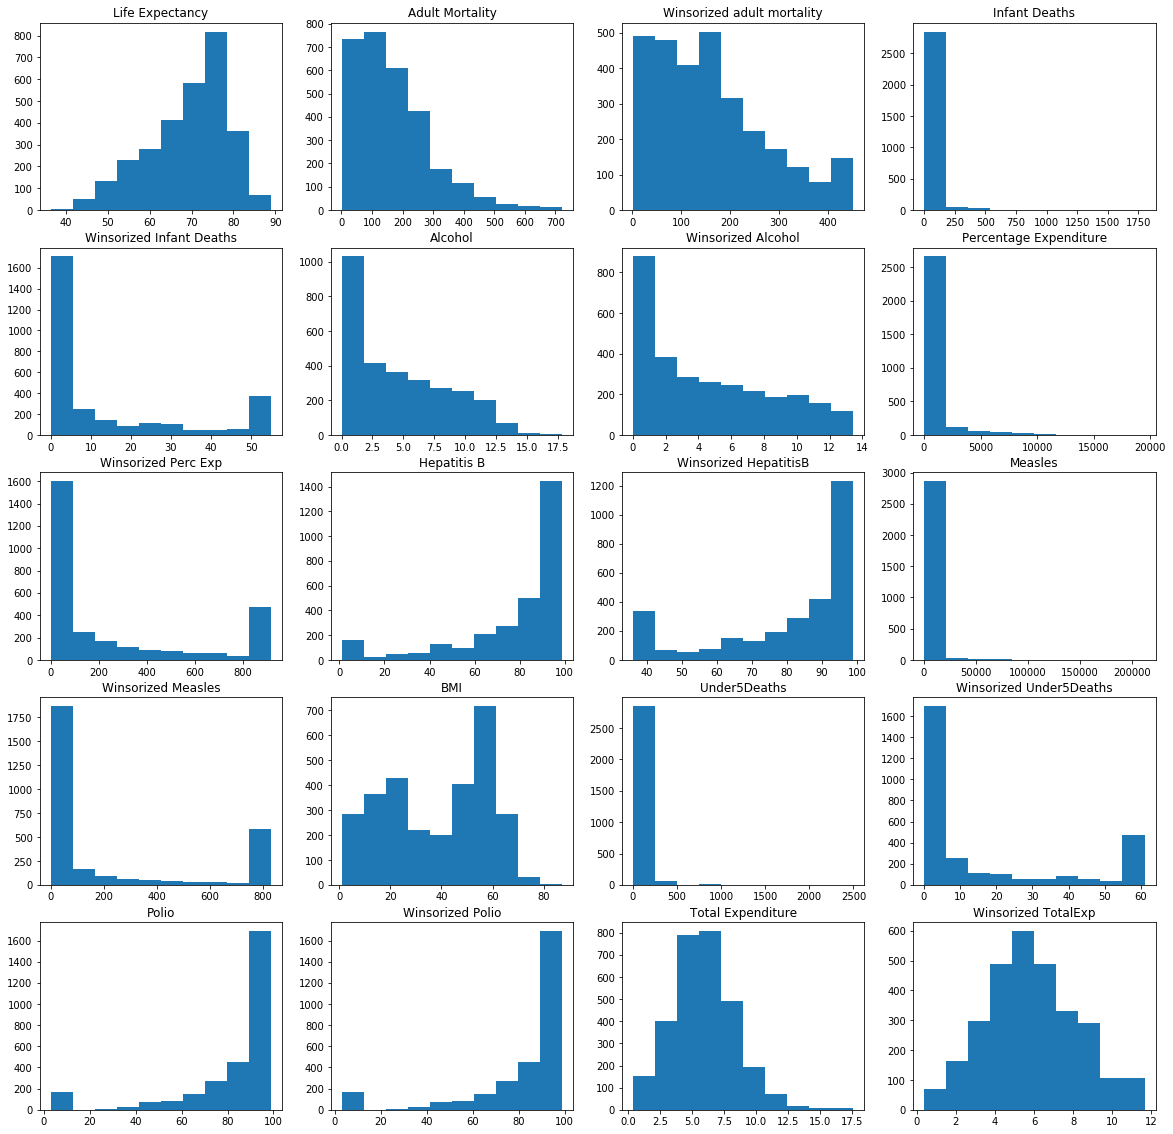

In [101]:
plt.figure(figsize= (20, 20))
plt.subplot(5,4,1)
plt.hist(lifeexp1['Life expectancy'])
plt.title("Life Expectancy")

plt.subplot(5,4,2)
plt.hist(lifeexp1['Adult Mortality'])
plt.title('Adult Mortality')

plt.subplot(5,4,3)
plt.hist(lifeexp1['winsorized_adultmortality'])
plt.title("Winsorized adult mortality")

plt.subplot(5,4,4)
plt.hist(lifeexp1['infant deaths'])
plt.title("Infant Deaths")

plt.subplot(5,4,5)
plt.hist(lifeexp1['winsorized_infantdeath'])
plt.title("Winsorized Infant Deaths")

plt.subplot(5,4,6)
plt.hist(lifeexp1['Alcohol'])
plt.title('Alcohol')

plt.subplot(5,4,7)
plt.hist(lifeexp1['winsorized_alcohol'])
plt.title("Winsorized Alcohol")

plt.subplot(5,4,8)
plt.hist(lifeexp1['percentage expenditure'])
plt.title("Percentage Expenditure")

plt.subplot(5,4,9)
plt.hist(lifeexp1['winsorization_percexp'])
plt.title('Winsorized Perc Exp')

plt.subplot(5,4,10)
plt.hist(lifeexp1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(5,4,11)
plt.hist(lifeexp1['winsorized_hepatitisb'])
plt.title("Winsorized HepatitisB")

plt.subplot(5,4,12)
plt.hist(lifeexp1['Measles'])
plt.title("Measles")

plt.subplot(5,4,13)
plt.hist(lifeexp1['winsorized_measles'])
plt.title("Winsorized Measles")

plt.subplot(5,4,14)
plt.hist(lifeexp1['BMI'])
plt.title("BMI")

plt.subplot(5,4,15)
plt.hist(lifeexp1['under-five deaths'])
plt.title("Under5Deaths")

plt.subplot(5,4,16)
plt.hist(lifeexp1['winsorized_under5'])
plt.title("Winsorized Under5Deaths")

plt.subplot(5,4,17)
plt.hist(lifeexp1['Polio'])
plt.title("Polio")

plt.subplot(5,4,18)
plt.hist(lifeexp1['winsorization_polio'])
plt.title("Winsorized Polio")

plt.subplot(5,4,19)
plt.hist(lifeexp1['Total expenditure'])
plt.title("Total Expenditure")

plt.subplot(5,4,20)
plt.hist(lifeexp1['winsorized_totalexp'])
plt.title("Winsorized TotalExp")

In [102]:
lifeexp1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_adultmortality', 'winsorized_infantdeath',
       'winsorized_alcohol', 'winsorization_percexp', 'winsorized_hepatitisb',
       'winsorized_measles', 'winsorized_under5', 'winsorization_polio',
       'winsorized_totalexp', 'winsorized_diphtheria', 'winsorized_hiv',
       'winsorized_gdp', 'winsorized_pop', 'winsorized_thinness1',
       'winsorized_thinness2'],
      dtype='object')

Text(0.5, 1.0, 'Schooling')

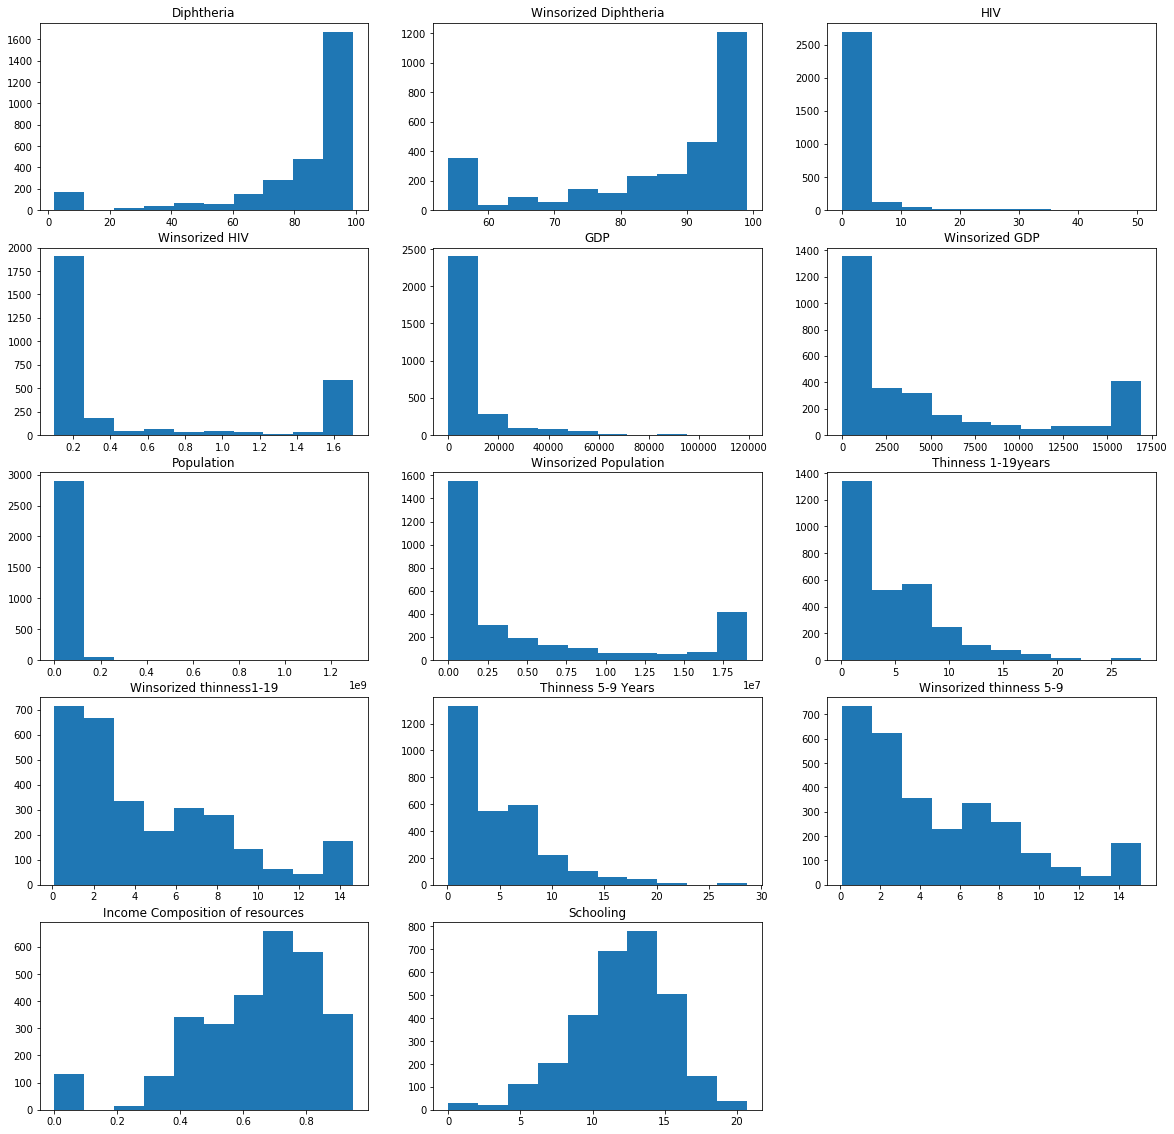

In [103]:
plt.figure(figsize = (20, 20))

plt.subplot(5,3,1)
plt.hist(lifeexp1['Diphtheria'])
plt.title('Diphtheria')

plt.subplot(5,3,2)
plt.hist(lifeexp1['winsorized_diphtheria'])
plt.title("Winsorized Diphtheria")

plt.subplot(5,3,3)
plt.hist(lifeexp1['HIV/AIDS'])
plt.title("HIV")

plt.subplot(5,3,4)
plt.hist(lifeexp1['winsorized_hiv'])
plt.title("Winsorized HIV")

plt.subplot(5,3,5)
plt.hist(lifeexp1['GDP'])
plt.title('GDP')

plt.subplot(5,3,6)
plt.hist(lifeexp1['winsorized_gdp'])
plt.title("Winsorized GDP")

plt.subplot(5,3,7)
plt.hist(lifeexp1['Population'])
plt.title("Population")

plt.subplot(5,3,8)
plt.hist(lifeexp1['winsorized_pop'])
plt.title("Winsorized Population")

plt.subplot(5,3,9)
plt.hist(lifeexp1['thinness  1-19 years'])
plt.title("Thinness 1-19years")

plt.subplot(5,3,10)
plt.hist(lifeexp1['winsorized_thinness1'])
plt.title('Winsorized thinness1-19')

plt.subplot(5,3,11)
plt.hist(lifeexp1['thinness 5-9 years'])
plt.title('Thinness 5-9 Years')

plt.subplot(5,3,12)
plt.hist(lifeexp1['winsorized_thinness2'])
plt.title("Winsorized thinness 5-9")

plt.subplot(5,3,13)
plt.hist(lifeexp1['Income composition of resources'])
plt.title("Income Composition of resources")

plt.subplot(5,3,14)
plt.hist(lifeexp1['Schooling'])
plt.title('Schooling')

In [104]:
lifeexp1.describe(include = ['O'])

,Country,Status
count,2938,2938
unique,193,2
top,Malawi,Developing
freq,16,2426


In [105]:
lifeexp1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_measles,winsorized_under5,winsorization_polio,winsorized_totalexp,winsorized_diphtheria,winsorized_hiv,winsorized_gdp,winsorized_pop,winsorized_thinness1,winsorized_thinness2
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,...,220.691287,16.695371,82.474643,5.905245,85.643927,0.508237,4921.644837,5.257499e+06,4.719677,4.753987
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,...,329.192321,22.638913,23.420689,2.331962,14.807990,0.640847,5794.931696,6.748727e+06,3.901667,3.977301
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,3.000000,0.370000,54.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,...,0.000000,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,...,17.000000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,...,360.250000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,...,831.000000,61.000000,99.000000,11.660000,99.000000,1.700000,16881.256800,1.898711e+07,14.605882,15.100000


## It appears that the original and winsorized variables have highly skewed distributions except schooling and winsorized Total Expenditure

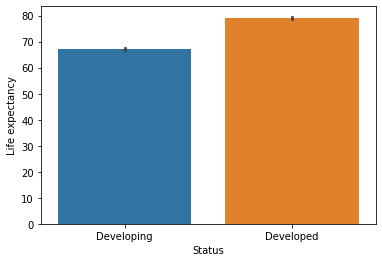

In [106]:
sns.barplot(lifeexp1['Status'], lifeexp1['Life expectancy'])

## From the above graph, it is clear that people from Developed countries have higher Life Expectancy

In [107]:
corrmat_original = lifeexp_df.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

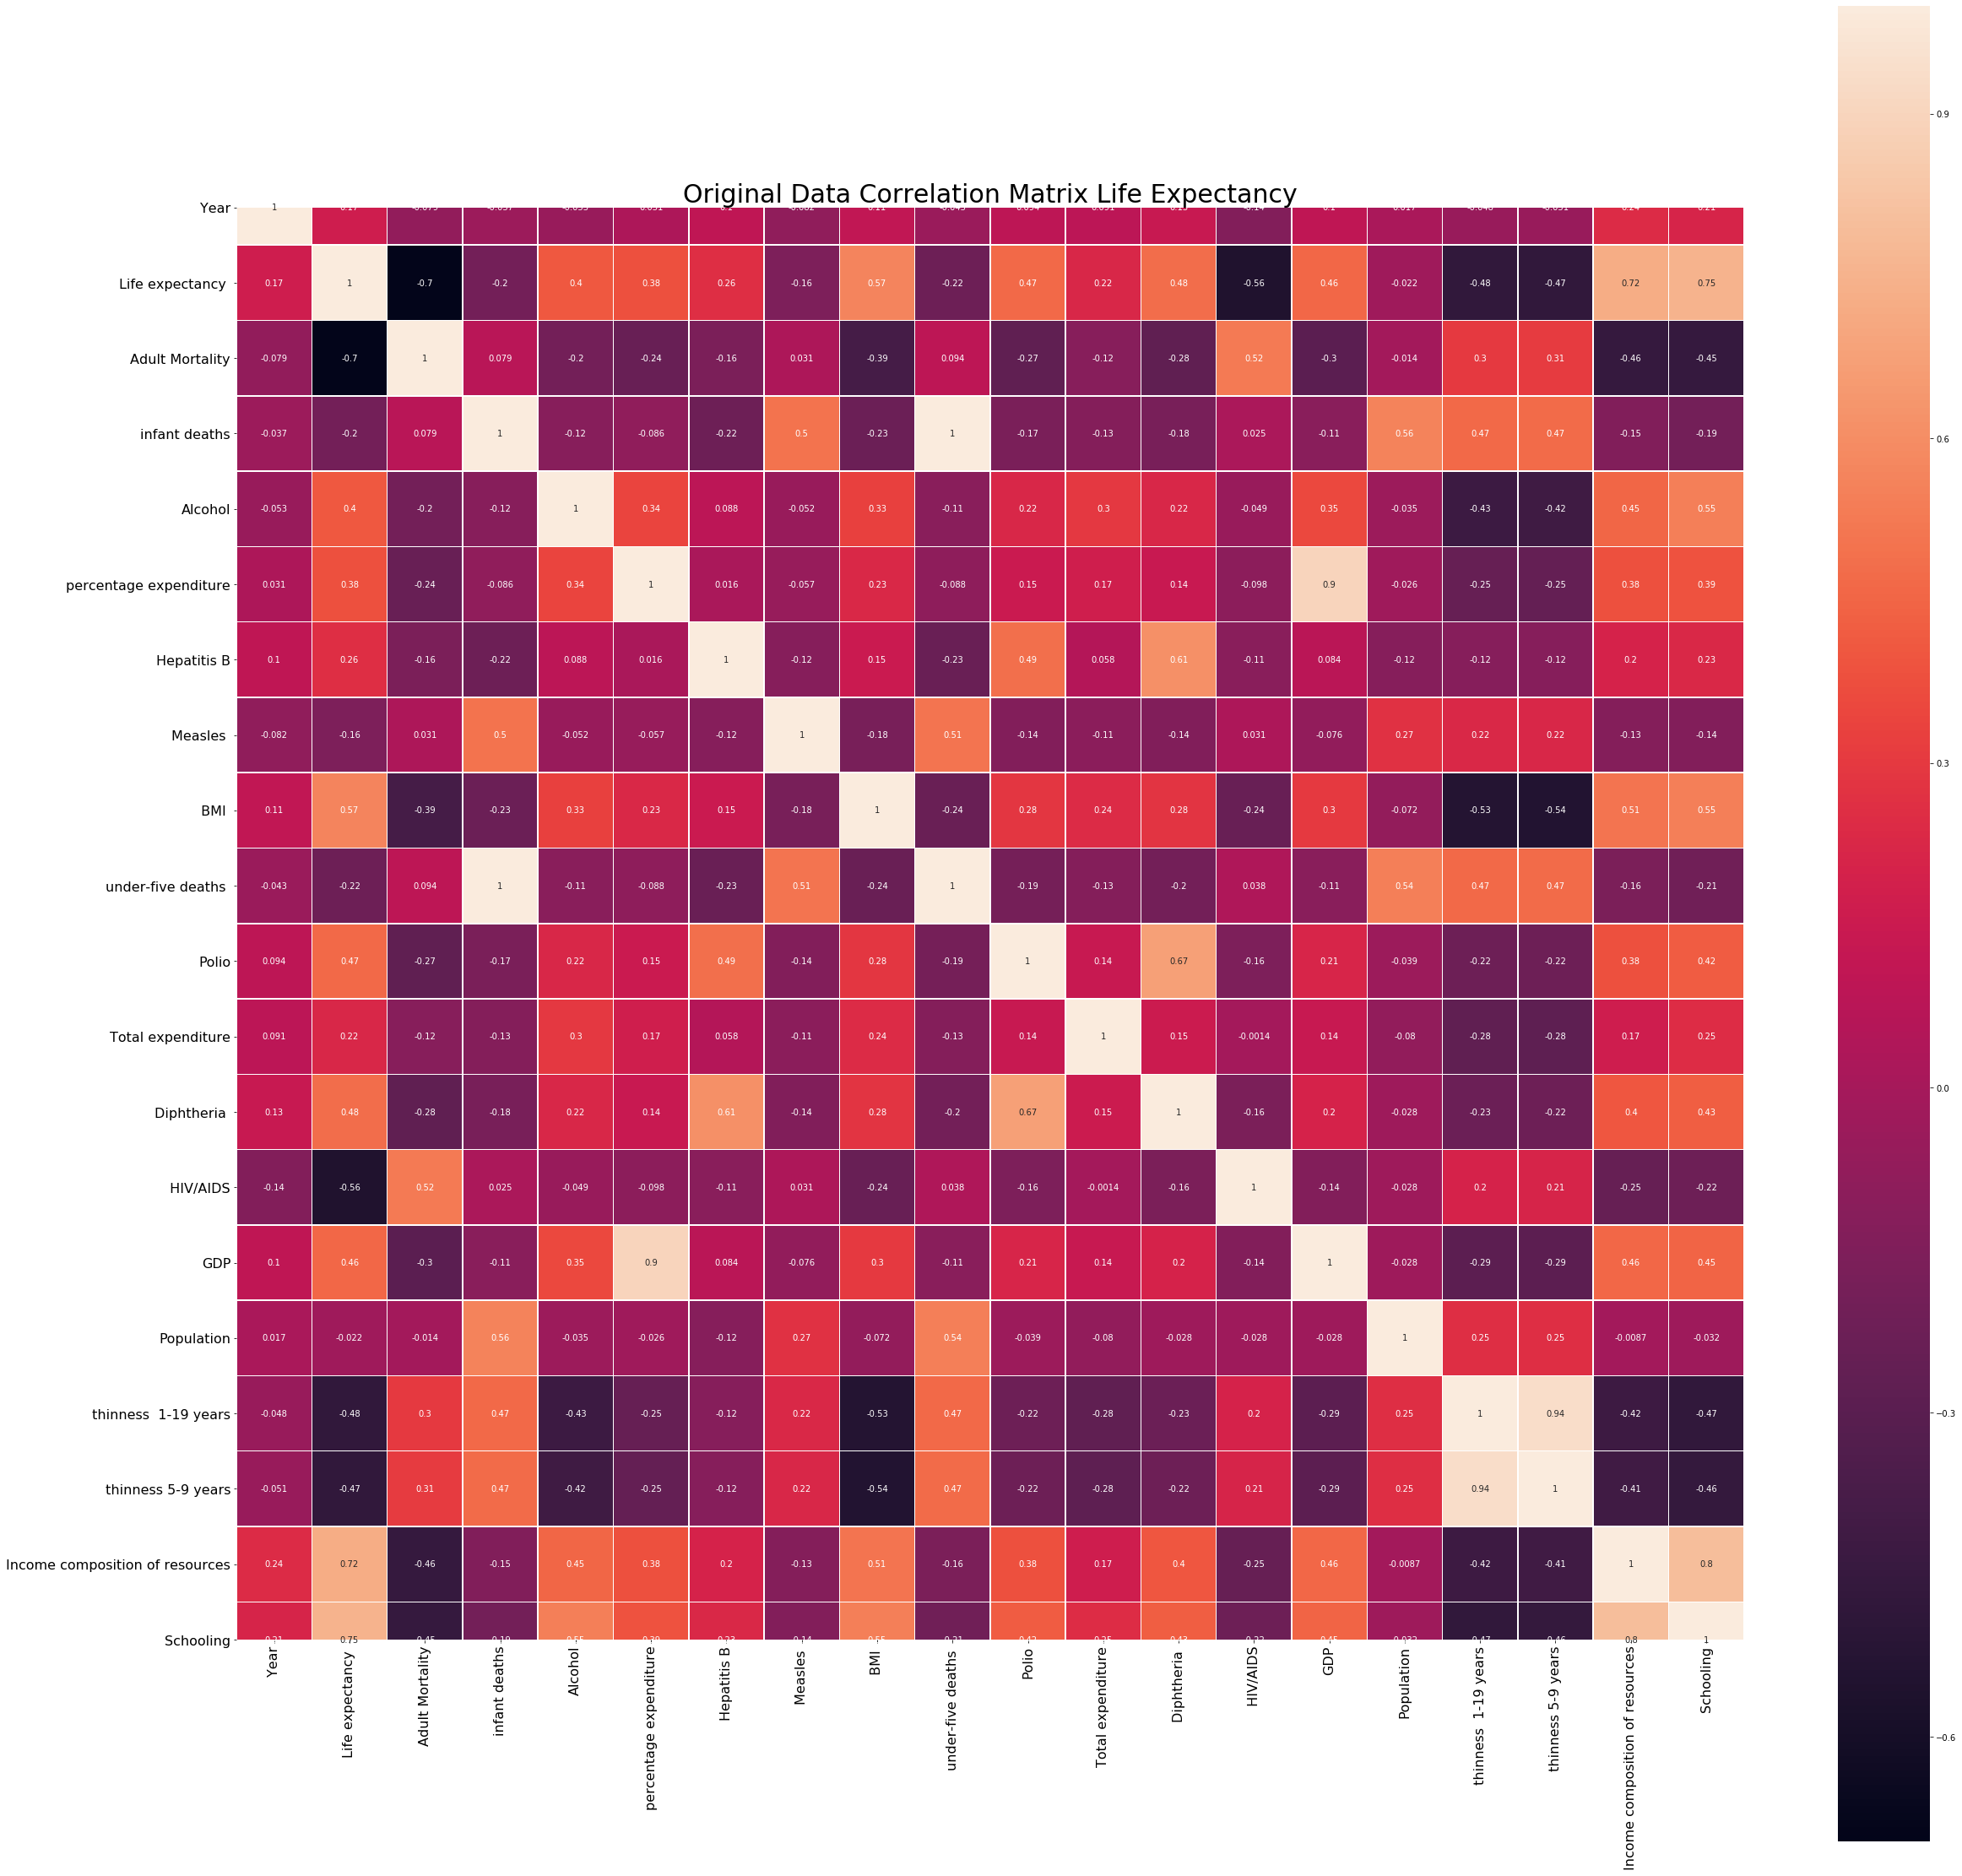

In [153]:
plt.figure(figsize = (40,40))
sns.heatmap(corrmat_original, square = True, annot = True, linewidths = 0.5)
plt.title("Original Data Correlation Matrix Life Expectancy", fontsize = 30)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

## High Positive correlation above 0.7 variables: Schooling, Income Composition with Life Expectancy. above 0.6 Diphtheria vaccination and Hepatitis B vaccination. High correlation of 0.94 between thinness variables, we could remove one thinness variable. High +ve corr 0.67 between Diphtheria and Polio. population, total expenditure, under5deaths, measles and infant deaths have very less correlation with life expectancy, we can remove those variables as well

In [109]:
lifeexp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 37 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null

Text(0.5, 1.0, 'Life Expectancy vs Schooling')

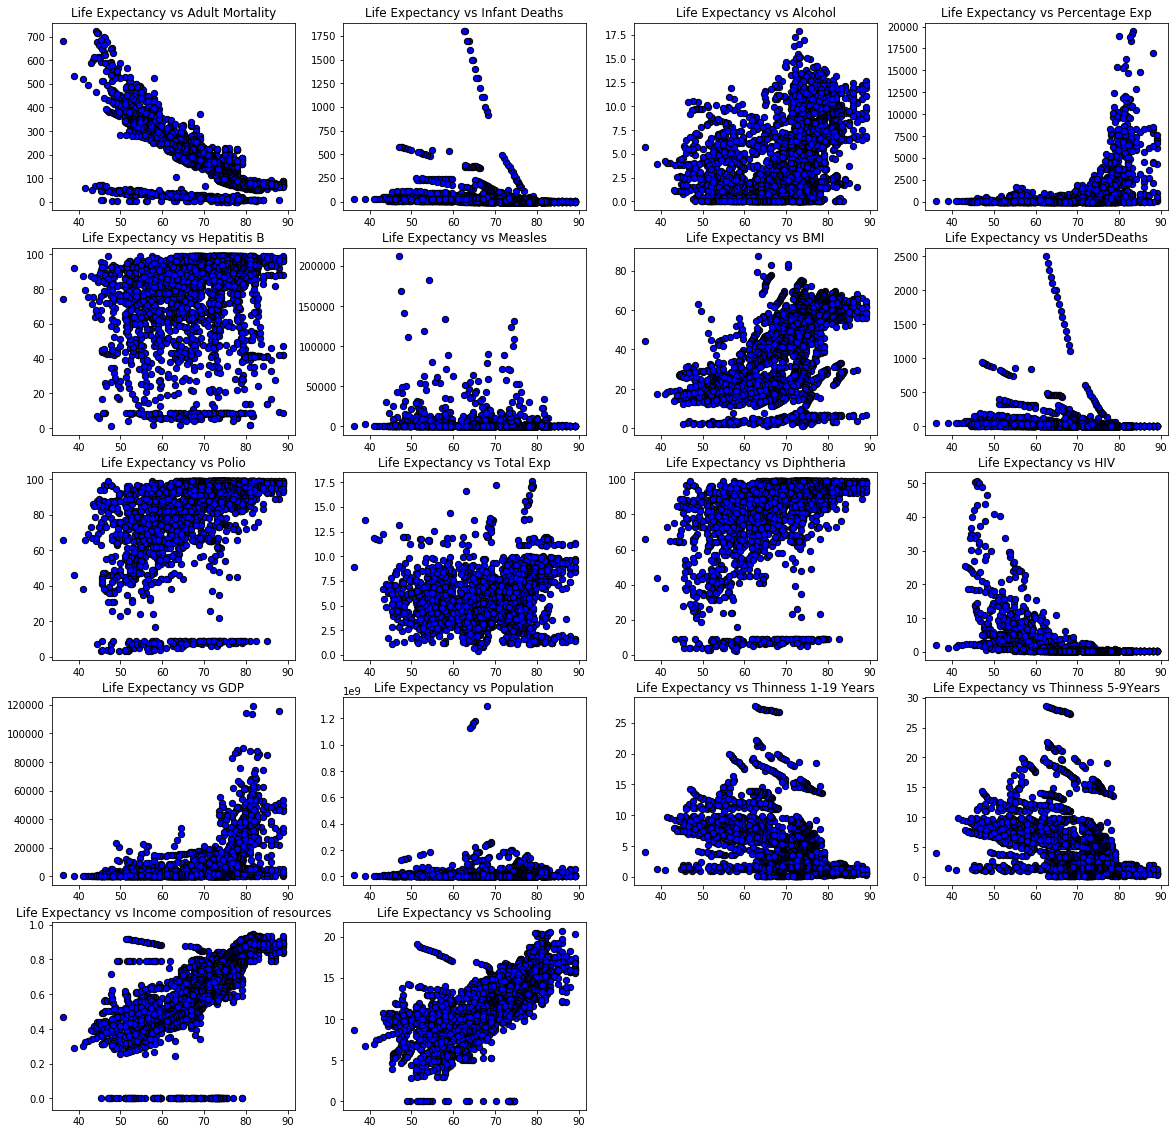

In [110]:
plt.figure(figsize = (20, 20))

plt.subplot(5,4,1)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Adult Mortality'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Adult Mortality")

plt.subplot(5,4,2)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['infant deaths'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Infant Deaths")

plt.subplot(5,4,3)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Alcohol'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Alcohol")

plt.subplot(5,4,4)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['percentage expenditure'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Percentage Exp")

plt.subplot(5,4,5)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Hepatitis B'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Hepatitis B")

plt.subplot(5,4,6)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Measles'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Measles")

plt.subplot(5,4,7)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['BMI'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs BMI")

plt.subplot(5,4,8)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['under-five deaths'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Under5Deaths")

plt.subplot(5,4,9)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Polio'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Polio")

plt.subplot(5,4,10)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Total expenditure'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Total Exp")

plt.subplot(5,4,11)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Diphtheria'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Diphtheria")

plt.subplot(5,4,12)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['HIV/AIDS'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs HIV")

plt.subplot(5,4,13)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['GDP'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs GDP")

plt.subplot(5,4,14)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Population'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Population")

plt.subplot(5,4,15)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['thinness  1-19 years'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Thinness 1-19 Years")

plt.subplot(5,4,16)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['thinness 5-9 years'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Thinness 5-9Years")

plt.subplot(5,4,17)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Income composition of resources'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Income composition of resources")

plt.subplot(5,4,18)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Schooling'], c= "b", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Schooling")

## From the above plots it is clear that Life Expectany increases with Schooling and income composition of resources, percentage expenditure. Increase in Polio immunization, Diphtheria vaccination has also increased Life expectancy

In [111]:
lifeexp1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_adultmortality', 'winsorized_infantdeath',
       'winsorized_alcohol', 'winsorization_percexp', 'winsorized_hepatitisb',
       'winsorized_measles', 'winsorized_under5', 'winsorization_polio',
       'winsorized_totalexp', 'winsorized_diphtheria', 'winsorized_hiv',
       'winsorized_gdp', 'winsorized_pop', 'winsorized_thinness1',
       'winsorized_thinness2'],
      dtype='object')

## Creating another dataset with winsorized variables to make the analysis clear and easy

In [112]:
winsorized_lifeexp = lifeexp1.copy()

In [113]:
winsorized_lifeexp.drop(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B'], axis =1, inplace = True)

In [114]:
winsorized_lifeexp.drop(['Measles', 'under-five deaths', 'Polio', 'Total expenditure',
                            'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                             'thinness  1-19 years', 'thinness 5-9 years'], axis =1, inplace = True)

In [115]:
winsorized_corr = winsorized_lifeexp.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

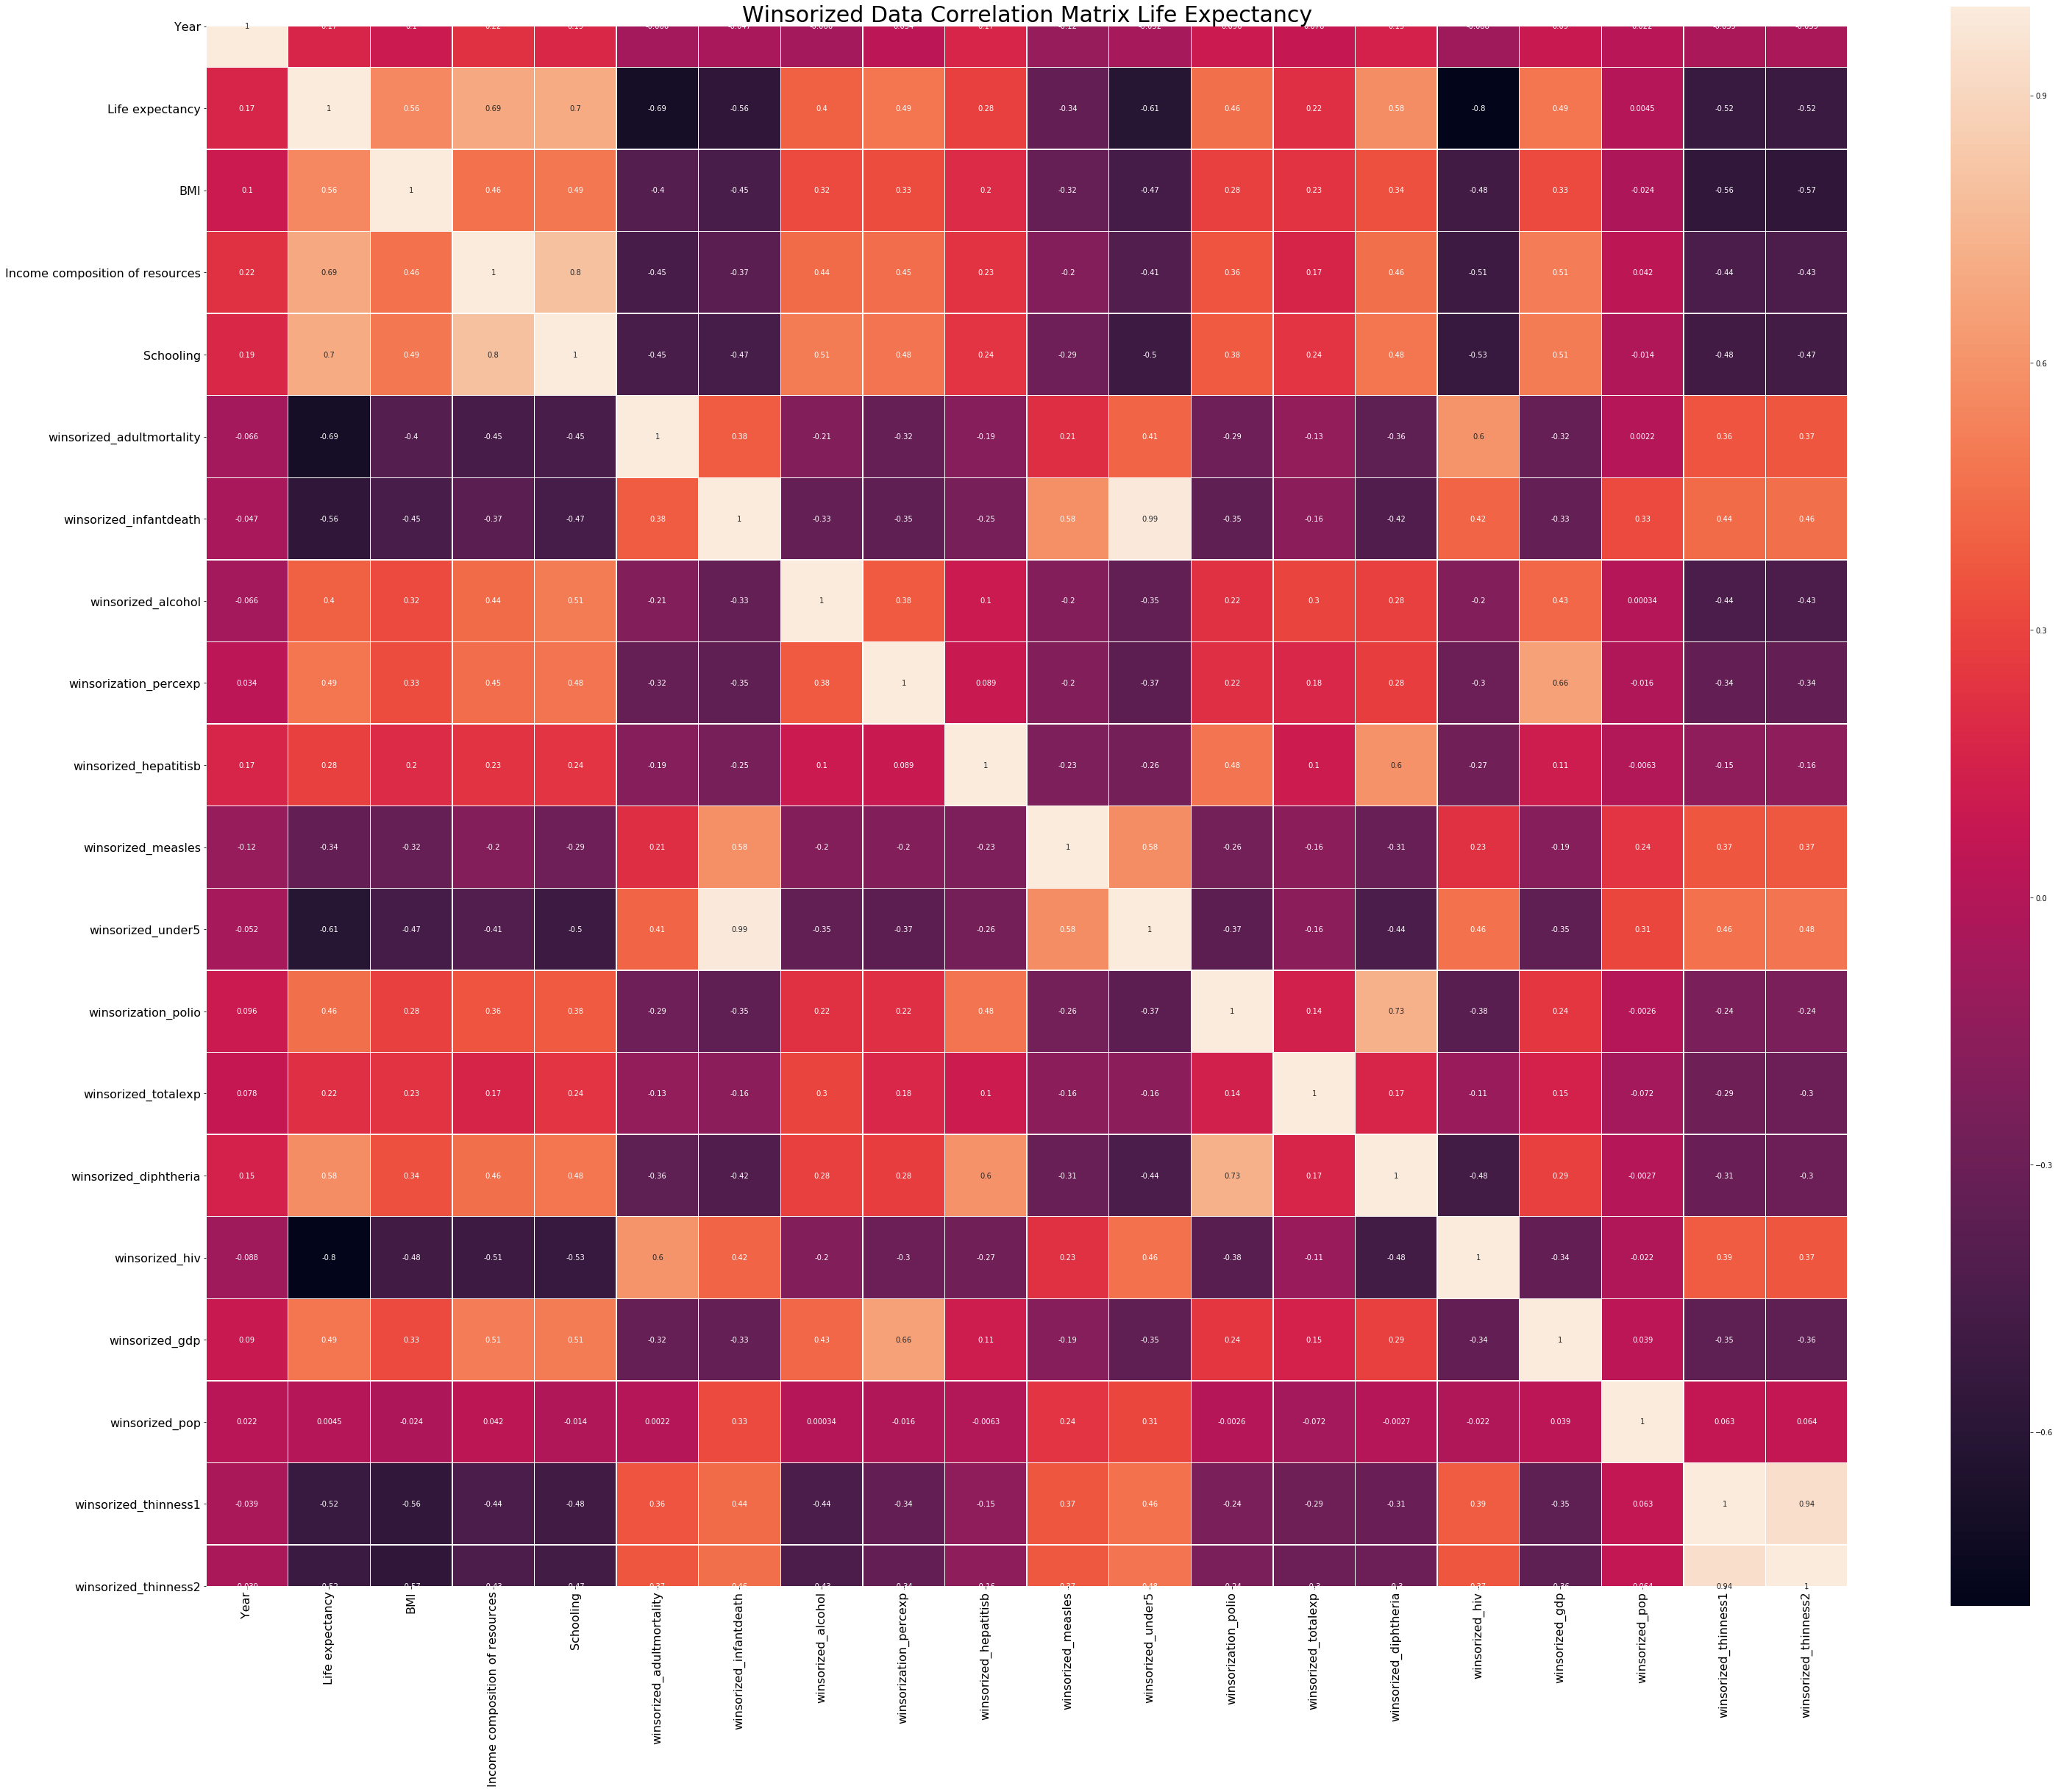

In [152]:
plt.figure(figsize = (50,40))
sns.heatmap(winsorized_corr, square = True, annot = True, linewidths = 0.5)
plt.title("Winsorized Data Correlation Matrix Life Expectancy", fontsize = 30)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

## thinness variables are highly correlated, we will be discarding thinness 5-9, polio, diphtheria and Hep B are highly correlated, we will be using diphtheria as it also has high correlation with our target variable. winsorized GDP and winsorized perc exp has same correlation, using GDP and discarding percent exp variable. Discarding total expenditure due to low correlation with Life expectancy. Schooling and income composition have high correlation, discarding income composition variable. Winsoried under 5 deaths and infant deaths have high correlation, discarid infant deaths

Text(0.5, 1.0, 'Life Expectancy vs Schooling')

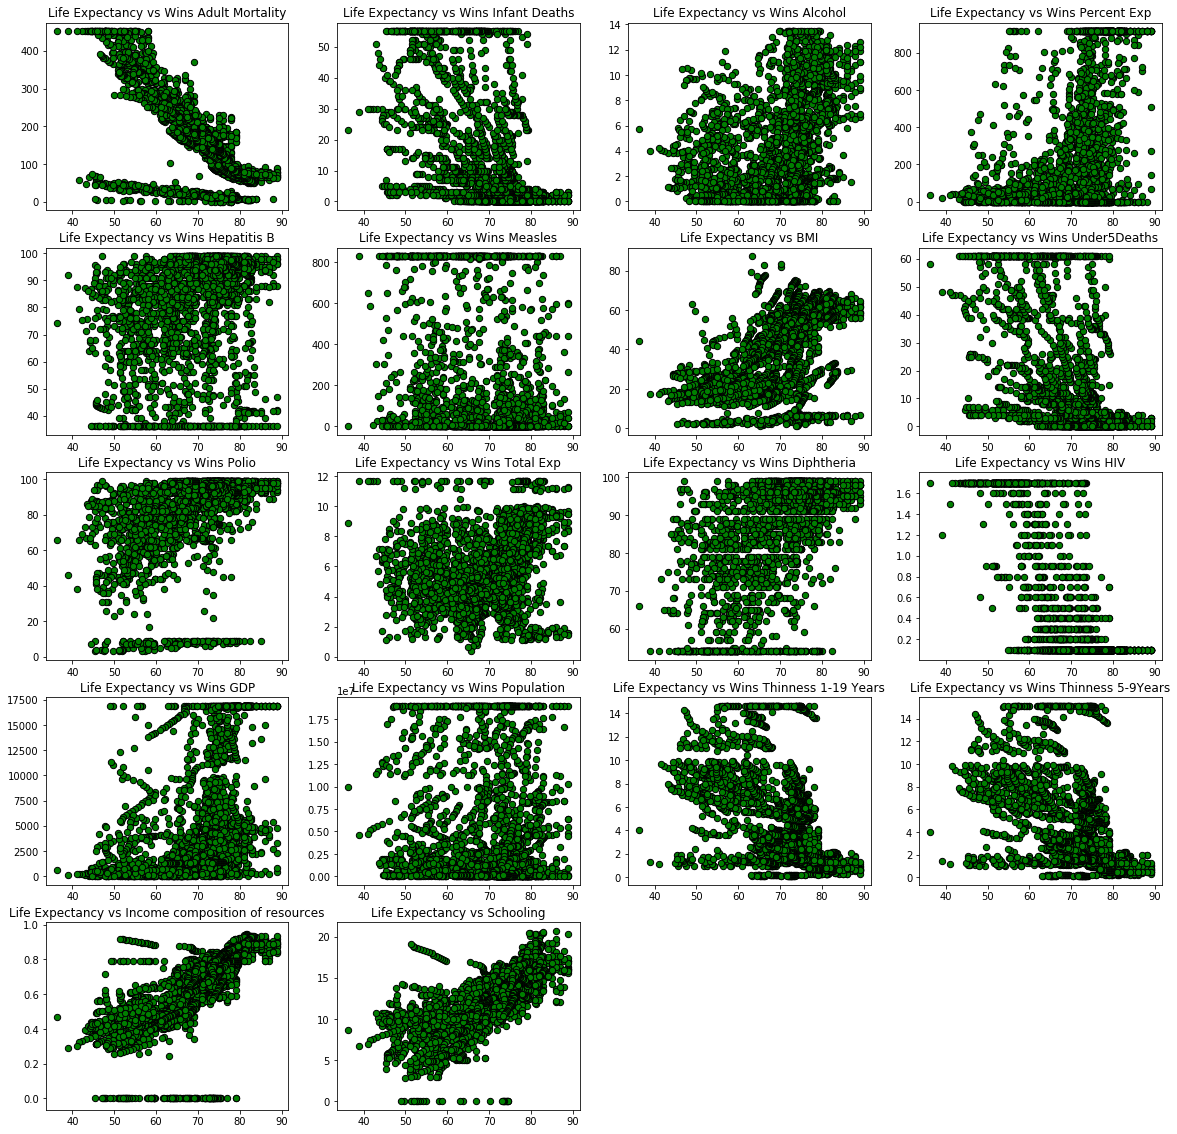

In [117]:
plt.figure(figsize = (20, 20))

plt.subplot(5,4,1)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_adultmortality'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Adult Mortality")

plt.subplot(5,4,2)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_infantdeath'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Infant Deaths")

plt.subplot(5,4,3)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_alcohol'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Alcohol")

plt.subplot(5,4,4)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorization_percexp'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Percent Exp")

plt.subplot(5,4,5)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_hepatitisb'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Hepatitis B")

plt.subplot(5,4,6)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_measles'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Measles")

plt.subplot(5,4,7)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['BMI'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs BMI")

plt.subplot(5,4,8)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_under5'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Under5Deaths")

plt.subplot(5,4,9)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorization_polio'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Polio")

plt.subplot(5,4,10)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_totalexp'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Total Exp")

plt.subplot(5,4,11)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_diphtheria'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Diphtheria")

plt.subplot(5,4,12)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_hiv'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins HIV")

plt.subplot(5,4,13)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_gdp'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins GDP")

plt.subplot(5,4,14)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_pop'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Population")

plt.subplot(5,4,15)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_thinness1'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Thinness 1-19 Years")

plt.subplot(5,4,16)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['winsorized_thinness2'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Wins Thinness 5-9Years")

plt.subplot(5,4,17)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Income composition of resources'], c= 'g', edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Income composition of resources")

plt.subplot(5,4,18)
plt.scatter(lifeexp1['Life expectancy'], lifeexp1['Schooling'], c= "g", edgecolors= 'black', s = 40)
plt.title("Life Expectancy vs Schooling")

Text(0.5, 1.0, 'Yearwise barchart of Years and Life Expectancy')

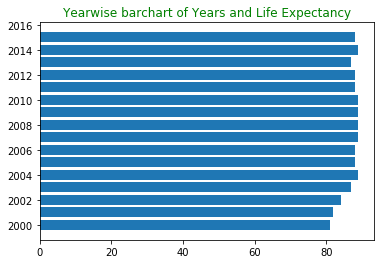

In [156]:
plt.barh(lifeexp1['Year'], lifeexp1['Life expectancy'])
plt.title("Yearwise barchart of Years and Life Expectancy", c = 'g')

## Life Expectancy did not change much from year 2004 to 2015, we will not be using this variable in our final model

In [118]:
lifeexp1['percentage expenditure'].describe()

count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: percentage expenditure, dtype: float64

In [119]:
lifeexp1['winsorization_percexp'].describe()

count    2938.000000
mean      258.764731
std       338.489649
min         0.000000
25%         4.685343
50%        64.912906
75%       441.534144
max       916.474177
Name: winsorization_percexp, dtype: float64

In [120]:
lifeexp1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,winsorized_measles,winsorized_under5,winsorization_polio,winsorized_totalexp,winsorized_diphtheria,winsorized_hiv,winsorized_gdp,winsorized_pop,winsorized_thinness1,winsorized_thinness2
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,831,61,6.0,8.16,65.0,0.1,584.259210,18987112.0,14.605882,15.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,492,61,58.0,8.18,62.0,0.1,612.696514,327582.0,14.605882,15.1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,430,61,62.0,8.13,64.0,0.1,631.744976,18987112.0,14.605882,15.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,831,61,67.0,8.52,67.0,0.1,669.959000,3696958.0,14.605882,15.1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,831,61,68.0,7.87,68.0,0.1,63.537231,2978599.0,14.605882,15.1


In [121]:
max(lifeexp1['Life expectancy'])

89.0

## Applying square root to make the Life Expectancy variable normal

In [122]:
sqrt_lifeexp = np.sqrt(lifeexp1['Life expectancy'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1e414ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2057f320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1e2d54a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20579668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a20575c50>],
 'means': []}

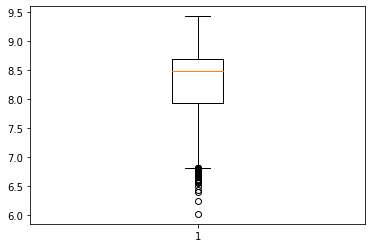

In [123]:
plt.boxplot(sqrt_lifeexp)

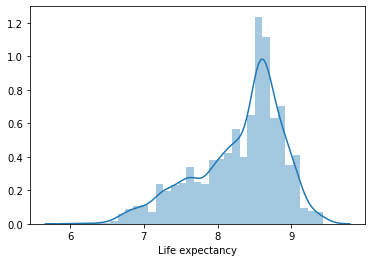

In [124]:
sns.distplot(sqrt_lifeexp)

## Applying square root did not make the data normal. We may have to follow a different technique

In [126]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(lifeexp1['Life expectancy'])
norm_stats = normaltest(lifeexp1['Life expectancy'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 204.68174678096847 and p value is 0.0
Normality test statistics is 176.63143145282152 and p value is 4.4154197376704856e-39


## With the above tests it is clear that the variable Life Expectancy is significantly different from Normal Distribution

In [128]:
from scipy.stats import boxcox
Lifeexpectancy_boxcox = boxcox(lifeexp1['Life expectancy'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a275a1d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a281114a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a275a1c18>],
 'medians': [<matplotlib.lines.Line2D at 0x1a28111dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2789d7b8>],
 'means': []}

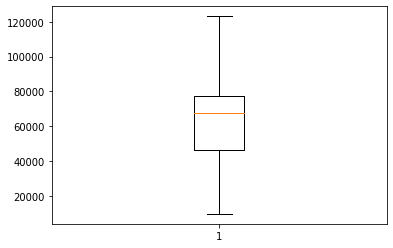

In [141]:
plt.boxplot(Lifeexpectancy_boxcox[0])

In [137]:
max(Lifeexpectancy_boxcox[0])

123222.04178051568

In [138]:
min(Lifeexpectancy_boxcox[0])

9613.087889396615

In [140]:
max(lifeexp1['Life expectancy'])

89.0

In [145]:
jb_stats = jarque_bera(Lifeexpectancy_boxcox[0])
norm_stats = normaltest(Lifeexpectancy_boxcox[0])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 42.05109159151643 and p value is 7.391310896665004e-10
Normality test statistics is 76.73653860520044 and p value is 2.172062720070316e-17


(array([ 67., 271., 306., 376., 386., 809., 409., 222.,  62.,  30.]),
 array([  9613.0878894 ,  20973.98327851,  32334.87866762,  43695.77405673,
         55056.66944584,  66417.56483496,  77778.46022407,  89139.35561318,
        100500.25100229, 111861.1463914 , 123222.04178052]),
 <a list of 10 Patch objects>)

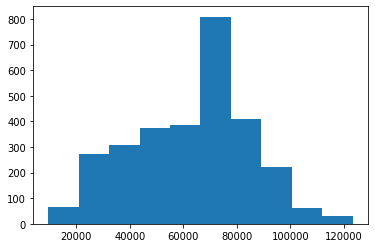

In [146]:
plt.hist(Lifeexpectancy_boxcox[0])

(array([  4.,  50., 134., 229., 278., 411., 583., 819., 362.,  68.]),
 array([36.3 , 41.57, 46.84, 52.11, 57.38, 62.65, 67.92, 73.19, 78.46,
        83.73, 89.  ]),
 <a list of 10 Patch objects>)

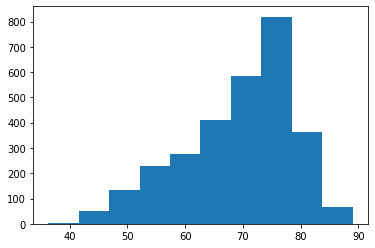

In [147]:
plt.hist(lifeexp1['Life expectancy'])

## Applying BoxCox transformation brings the Life Expectancy variable close to normal distribution. we can use this variable in our final analysis

In [148]:
winsorized_lifeexp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'BMI',
       'Income composition of resources', 'Schooling',
       'winsorized_adultmortality', 'winsorized_infantdeath',
       'winsorized_alcohol', 'winsorization_percexp', 'winsorized_hepatitisb',
       'winsorized_measles', 'winsorized_under5', 'winsorization_polio',
       'winsorized_totalexp', 'winsorized_diphtheria', 'winsorized_hiv',
       'winsorized_gdp', 'winsorized_pop', 'winsorized_thinness1',
       'winsorized_thinness2'],
      dtype='object')

## Final variables selected for the model

### Lifeexpectany_boxcox -  Target variable
### winsorized_thinness1 (thinness 1-19 years)
### winsorized_gdp
### winsorized_diphtheria
### winsorized_schooling
### winsorized_under5
### BMI
### winorized_hiv
### winsorized_measles
### winsorized_alcohol
### winsorized_adultmortality

## Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

I have used filter methods to reduce the number of variables which explain high variability in the data. The variables under5deaths and infant deaths are highly correlated, hence we are using under5 and discarded infant deaths, using both variables will be redundant and may result in overfitting. Similarly we have discarded other variables like thinnes 5-9 which has high correlation with thinness 1-19, percentage expenditure as it has high correlation with GDP. Polio, diphtheria and hepatitis B have high correlations and we are using winsorized diphtheria in our model as it is also highly correlated with our target variable. Dropped total expenditure and poplation variables as they have low correlation with target variable Life expectancy.